This research investigates more than five years of crime statistics recorded by the Los Angeles Police Department (LAPD), from 2020 to 2025. The study uses data cleansing, exploratory analysis, visualisation, and machine learning techniques to find relevant patterns in victim demographics, crime categories, geographic hotspots, and temporal trends. The research aims to answer a critical prediction question in addition to providing descriptive information. *Can victim and crime features be utilised to tell if an incident is violent or nonviolent?*

# **<u>Introduction<u>**

In this section, we import the necessary libraries needed for data analysis and visualization. We also load the dataset on which we will do all our cleaning, exploratory analysis, and modelling.

## **Importing the Necessary Libraries & Loading the Data**

In [1]:
# Import the necessary libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting the current working directory for easier data loading
import os
pwd = os.getcwd()

In [3]:
# Loading the dataset and viewing the first few rows
dataset = pd.read_parquet(path = pwd + "/crime_LA.parquet")
dataset.head(n = 5)

DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0  211507896  04/11/2021 12:00:00 AM  11/07/2020 12:00:00 AM       845    15   
1  201516622  10/21/2020 12:00:00 AM  10/18/2020 12:00:00 AM      1845    15   
2  240913563  12/10/2024 12:00:00 AM  10/30/2020 12:00:00 AM      1240     9   
3  210704711  12/24/2020 12:00:00 AM  12/24/2020 12:00:00 AM      1310     7   
4  201418201  10/03/2020 12:00:00 AM  09/29/2020 12:00:00 AM      1830    14   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0  N Hollywood         1502         2     354   
1  N Hollywood         1521         1     230   
2     Van Nuys          933         2     354   
3     Wilshire          782         1     331   
4      Pacific         1454         1     420   

                                         Crm Cd Desc  ... Status  Status Desc  \
0                                  THEFT OF IDENTITY  ...     IC  Invest Cont   
1     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  ...     IC  Invest Cont   
2                                  THEFT OF IDENTITY  ...     IC  Invest Cont   
3  THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...  ...     IC  Invest Cont   
4    THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)  ...     IC  Invest Cont   

  Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
0    354.0      NaN       NaN      NaN   
1    230.0      NaN       NaN      NaN   
2    354.0      NaN       NaN      NaN   
3    331.0      NaN       NaN      NaN   
4    420.0      NaN       NaN      NaN   

                                   LOCATION Cross Street      LAT       LON  
0   7800    BEEMAN                       AV         None  34.2124 -118.4092  
1           ATOLL                        AV     N  GAULT  34.1993 -118.4203  
2  14600    SYLVAN                       ST         None  34.1847 -118.4509  
3   6000    COMEY                        AV         None  34.0339 -118.3747  
4                   4700    LA VILLA MARINA         None  33.9813 -118.4350  

[5 rows x 28 columns]

The dataset used for this job is named **Crime Data from 2020 to Present** and was obtained from the US government's official [data website](https://catalog.data.gov/dataset/crime-data-from-2020-to-present). This dataset contains reported crime incidents in Los Angeles from 2020 forward. It is based on LAPD crime reports and includes data copied from paper records. To protect the victims' privacy, some location and residence details, as well as victim descent, have been generalized or removed. The dataset is part of the LAPD's transition to the FBI-mandated NIBRS system, and while it is generally correct, some inaccuracies may arise. It is an effective tool for assessing crime trends in the city. The metadata for this dataset may be accessed from [here](https://catalog.data.gov/harvest/object/aefb0682-9bda-4700-90ed-86bb20e210c6).

## **Data Cleaning & Processing**

It is always a good practice to create a copy of the dataset and work on that instead so that for any issue, we can roll back to the original dataset.

In [4]:
# Creating a copy of the dataset
crime = dataset.copy()

In [5]:
# Checking the number of rows and columns of the dataset
crime.shape

(1004991, 28)

In [6]:
# Taking a look at the columns of the dataset
crime.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

This dataset has a lot of columns. All of these columns are not necessary for us. So let us drop a few columns to make the data easier to use. To identify such columns, taking a look at the dataset helps. Working with all the columns are not feasible. So, depending upon the context and what we want to achieve, we drop a few columns for now. If we later feel like more columns are required to be dropped, then we will do that as well.

### Working with the Columns & Data Types

In [7]:
# Selecting the columns that are unnecessary for our use case
cols_to_drop = [
    "AREA",
    "Rpt Dist No",
    "Crm Cd",
    "Mocodes",
    "Premis Cd",
    "Weapon Used Cd",
    "Status",
    "Crm Cd 1",
    "Crm Cd 2",
    "Crm Cd 3",
    "Crm Cd 4",
    "Cross Street",
    "LAT",
    "LON"
]

# Dropping the columns and re-checking the shape of the dataset
crime.drop(columns = cols_to_drop, inplace = True)

In [8]:
# Checking the number of rows and columns now
crime.shape

(1004991, 14)

Thus we dropped 12 redundant columns from the original 28, making it a total of 16 columns.

The name of the columns are not well-formatted. Formatting those will help us in the future works.

In [9]:
# Renaming the columns
crime.rename(columns = {
    "DR_NO": "id",
    "Date Rptd": "date_reported",
    "DATE OCC": "date_occurrence",
    "TIME OCC": "time_occurrence",
    "AREA NAME": "area",
    "Part 1-2": "crime_class",
    "Crm Cd Desc": "crime_description",
    "Vict Age": "victim_age",
    "Vict Sex": "victim_sex",
    "Vict Descent": "victim_descent",
    "Premis Desc": "premise",
    "Weapon Desc": "weapon_used",
    "Status Desc": "status",
    "LOCATION": "location"
    }, 
    inplace = True
)

Now that we have renamed the columns to a more convenient format, it is time to look at the variables and see whether everything is the correct type.

In [10]:
# Checking the variable types
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   id                 1004991 non-null  int64 
 1   date_reported      1004991 non-null  object
 2   date_occurrence    1004991 non-null  object
 3   time_occurrence    1004991 non-null  int64 
 4   area               1004991 non-null  object
 5   crime_class        1004991 non-null  int64 
 6   crime_description  1004991 non-null  object
 7   victim_age         1004991 non-null  int64 
 8   victim_sex         860347 non-null   object
 9   victim_descent     860335 non-null   object
 10  premise            1004403 non-null  object
 11  weapon_used        327247 non-null   object
 12  status             1004991 non-null  object
 13  location           1004991 non-null  object
dtypes: int64(4), object(10)
memory usage: 107.3+ MB


As can be seen from the above, quite a number of columns are not in the correct type. Let us fix those.

In [11]:
# First, correcting the date formatting
crime["date_reported"] = pd.to_datetime(
    arg = crime["date_reported"], 
    format = "%m/%d/%Y %I:%M:%S %p"
)
crime["date_occurrence"] = pd.to_datetime(
    arg = crime["date_occurrence"], 
    format = "%m/%d/%Y %I:%M:%S %p"
)

# Now we fix the time column by firstly adding 0s at the beginning when necessary to make all the numbers four digits
crime["time_occurrence"] = crime["time_occurrence"].astype(str).str.zfill(width = 4)

# Adding the date and time of occurrence into a column
crime["date_time_occurrence"] = pd.to_datetime(
    arg = crime["date_occurrence"].astype("str") + " " + crime["time_occurrence"].astype("str"),
    format = "%Y-%m-%d %H%M"
)

# Dropping the date and time occurrence columns
crime.drop(
    columns = ["date_occurrence", "time_occurrence"], 
    inplace = True
)

Now, we convert some of these columns to category as they are categorical variables

In [12]:
# Converting object variables into categorical variables
cat_var = [
    "area",
    "crime_description",
    "crime_class",
    "victim_sex",
    "victim_descent",
    "premise",
    "weapon_used",
    "status",
]

# Changing the data types
for var in cat_var:
    crime[var] = crime[var].astype("category")

In [13]:
# Checking to see whether the data types are now fixed or not
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 13 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   id                    1004991 non-null  int64         
 1   date_reported         1004991 non-null  datetime64[ns]
 2   area                  1004991 non-null  category      
 3   crime_class           1004991 non-null  category      
 4   crime_description     1004991 non-null  category      
 5   victim_age            1004991 non-null  int64         
 6   victim_sex            860347 non-null   category      
 7   victim_descent        860335 non-null   category      
 8   premise               1004403 non-null  category      
 9   weapon_used           327247 non-null   category      
 10  status                1004991 non-null  category      
 11  location              1004991 non-null  object        
 12  date_time_occurrence  1004991 non-null  da

Let us take a quick look at the unique values of some of the columns

In [14]:
# Getting the unique entries of the "crime_class" column
crime["crime_class"].value_counts()

crime_class
1    602645
2    402346
Name: count, dtype: int64

Crime part 1 and part 2 might be difficult to understand for the common readers. With a quick google search, we found that,

* Crime Class Part 1 = serious/violent crimes
* Crime Class Part 2 = less serious crimes

So, let us replace the values with that.

In [15]:
# Changing the crime_class variables into a more understandable ones
crime["crime_class"] = crime["crime_class"].replace(
    {
        1: "Violent Crimes",
        2: "Less Violent Crimes"
    }
)

In [16]:
# We also change the "UNK" on the "status" column to "Unknown" for better coherency
crime["status"] = crime["status"].replace({"UNK": "Unknown"})

Some of the columns have all capitalized values which can be converted into proper cases.

In [17]:
# Converting the fully capitalized columns into proper cases
cap_col = [
    "crime_description",
    "premise",
    "location"
]
for col in cap_col:
    crime[col] = crime[col].str.capitalize()
    crime[col] = crime[col].astype("category")


In [18]:
# Getting the unique entries of the "victim_sex" columns
crime["victim_sex"].value_counts()

victim_sex
M    403879
F    358580
X     97773
H       114
-         1
Name: count, dtype: int64

Here, M and F may mean males and females respectively. We don't know what X and H means since these are all coded by the LAPD for privacy reasons. So we leave these two columns as it is because trying to change them might lose us some critical context from the data. Let us replace the "-" with "U" for unknown.

In [19]:
# Changing the "-" from the victim_sex column to "U"
crime["victim_sex"] = crime["victim_sex"].replace({"-": "U"})

In [20]:
# Getting the unique entries of the "victim_descent" columns
crime["victim_descent"].value_counts()

victim_descent
H    296404
W    201442
B    135816
X    106685
O     78005
A     21340
K      5990
F      4838
C      4631
J      1586
V      1195
I      1015
Z       577
P       288
U       221
D        91
L        77
G        74
S        58
-         2
Name: count, dtype: int64

We can see a lot of descents. These descents are used as code names by the LAPD to reduce biasness and discrimination. So let us not decode that. We will, however, will replace the "-" with "unknown".

In [21]:
crime["victim_descent"].value_counts()

victim_descent
H    296404
W    201442
B    135816
X    106685
O     78005
A     21340
K      5990
F      4838
C      4631
J      1586
V      1195
I      1015
Z       577
P       288
U       221
D        91
L        77
G        74
S        58
-         2
Name: count, dtype: int64

In [22]:
# Changing the "-" from the victim_descent column to "U"
crime["victim_descent"] = crime["victim_descent"].replace({"-": "U"})

Lastly, the `location` column has a lot of trailing whitespaces in the values. Let us fix that.

In [23]:
# Removing the trailing whitespaces from the "location" column
crime["location"] = crime["location"].str.strip()

### Working with the Missing Data

In [24]:
# Pulling the missing data information column-wise
crime.isna().sum()

id                           0
date_reported                0
area                         0
crime_class                  0
crime_description            0
victim_age                   0
victim_sex              144644
victim_descent          144656
premise                    588
weapon_used             677744
status                       0
location                     0
date_time_occurrence         0
dtype: int64

<Axes: >

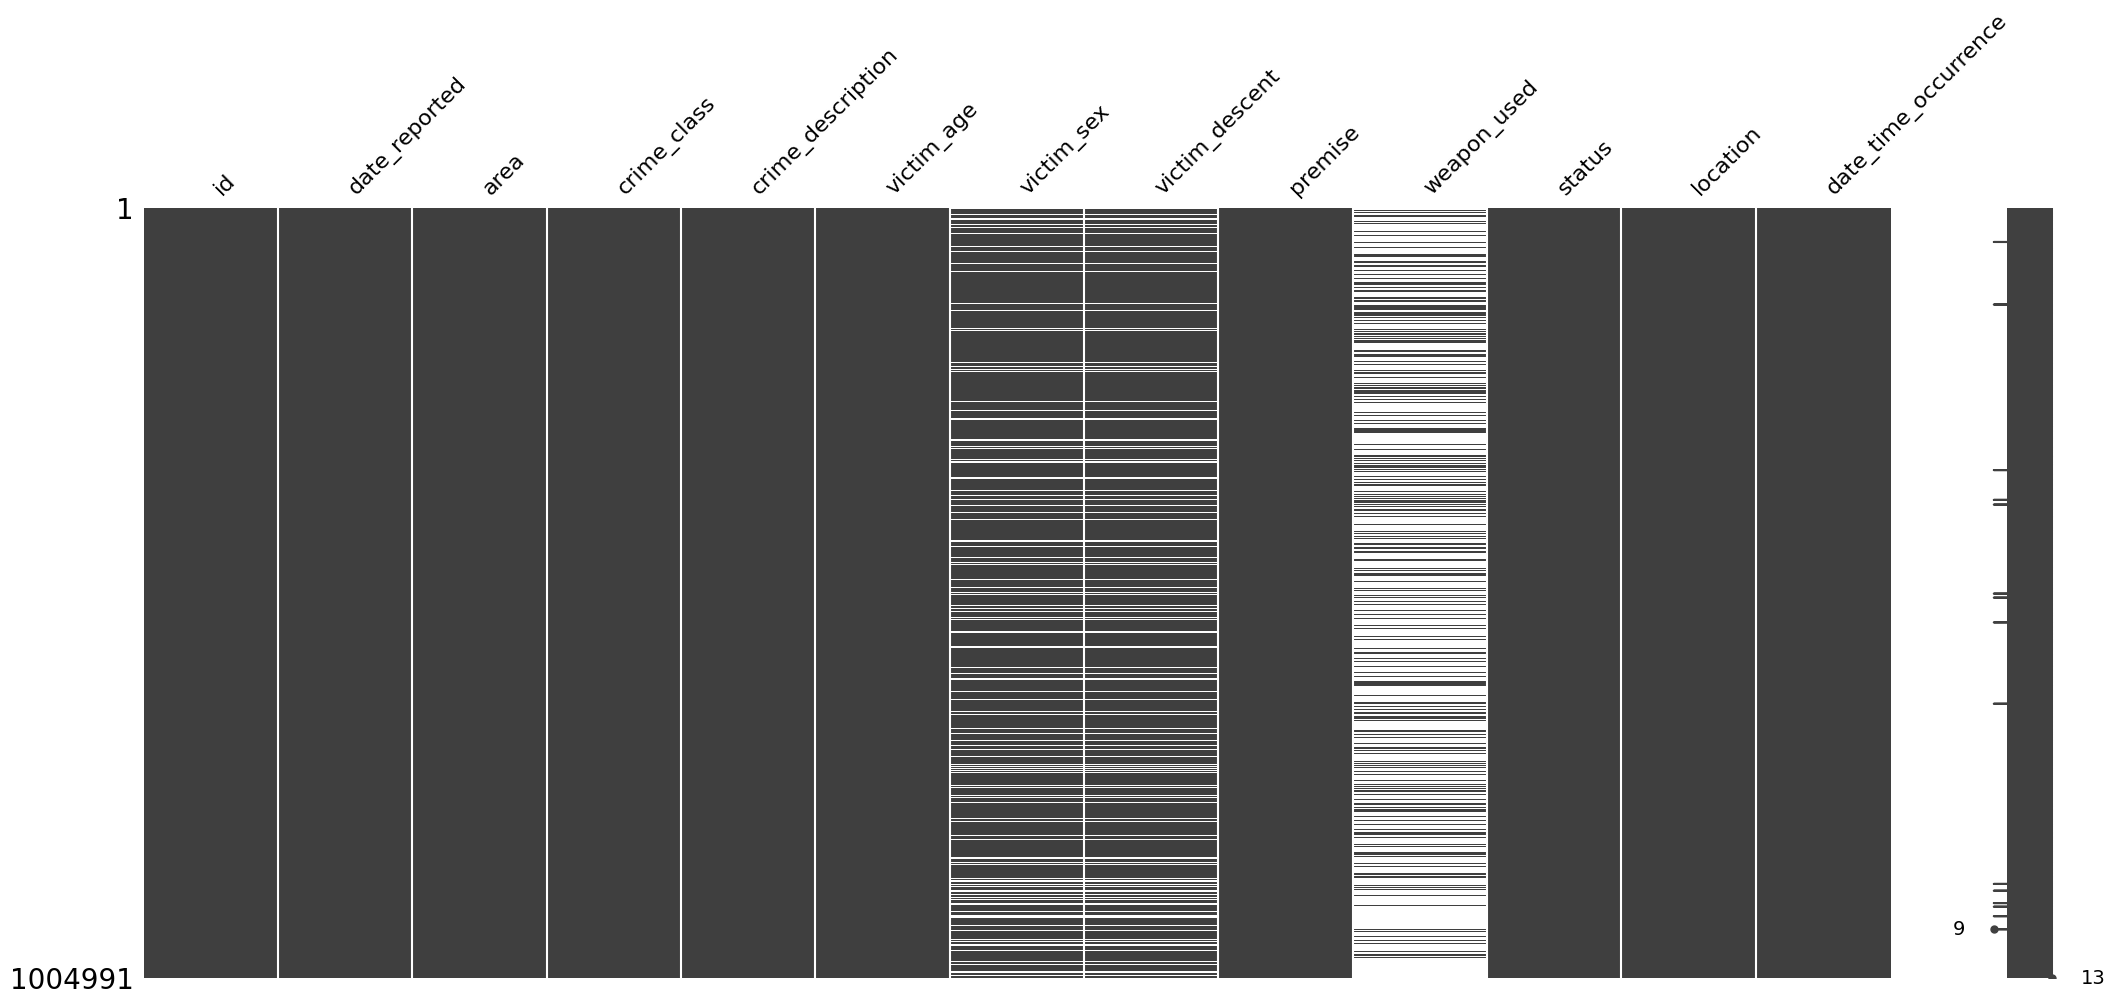

In [25]:
# Visualizing the missing data
import missingno as msno
msno.matrix(df = crime)

As can be shown from the graph and number of data missing, the columns `victim_sex` and `victim_descent` have nearly equal number of missing values. This suggests that they're missing together (same incidence).

So to keep it the absolute safest and preserve integrity with the `victim_sex` or `victim_descent`, we replace the missing values with "U" for unknown instead of filling the missing values with something else.

In [26]:
# Filling the missing values from "victim_sex" and "victim_descent" with "U" for unknown
crime["victim_sex"] = crime["victim_sex"].fillna("U")
crime["victim_descent"] = crime["victim_descent"].fillna("U")

There are a lot of missing values for the column `weapon_used` (about 67% to be exact). We could have taken the same approach of filing them with "Unknown" because replacing the missing values with something else would be misleading, but that could bias and affect our machine learning model.

Hence, the best practice in my opinion is dropping the column. Dropping this column will result in the dataset having a total of 12 columns.

In [27]:
# Dropping the column "weapon_used"
crime.drop(columns = "weapon_used", inplace = True)

Finally, we have the `premise` column which had only 0.06% missing values. So these rows can easily be dropped or replaced with something else and this will not affect the model at all. So let us replace the values with "Unknown".

In [28]:
# Filling the missing values from "premise" with "Unknown". But first, we add a category called "Unknown"
crime["premise"] = crime["premise"].cat.add_categories("Unknown")
crime["premise"] = crime["premise"].fillna("Unknown")

In [29]:
# Checking for the last time whether any missing values are left or not
crime.isna().sum()

id                      0
date_reported           0
area                    0
crime_class             0
crime_description       0
victim_age              0
victim_sex              0
victim_descent          0
premise                 0
status                  0
location                0
date_time_occurrence    0
dtype: int64

### Working with Duplicate Entries

After dealing with the missing values, we now deal with the duplicate entries **(if any)**.

In [30]:
# Checking to see the total number of duplicate entries
crime.duplicated().sum()

0

So, this dataset does not have any duplicate entries. We can move on to the next section.

### Working with Outliers & Conducting Sanity Check

In [31]:
# Let us look at the data types once again
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   id                    1004991 non-null  int64         
 1   date_reported         1004991 non-null  datetime64[ns]
 2   area                  1004991 non-null  category      
 3   crime_class           1004991 non-null  category      
 4   crime_description     1004991 non-null  category      
 5   victim_age            1004991 non-null  int64         
 6   victim_sex            1004991 non-null  category      
 7   victim_descent        1004991 non-null  category      
 8   premise               1004991 non-null  category      
 9   status                1004991 non-null  category      
 10  location              1004991 non-null  object        
 11  date_time_occurrence  1004991 non-null  datetime64[ns]
dtypes: category(7), datetime64[ns](2), int64(2

Here, the only integer values that require an outlier-check is `victim_age`. Before working with the column, let us take a look at the summary statistics of the `victim_age` column

In [32]:
# The summary statistic for the "victim_age" column
crime[["victim_age"]].describe().round(decimals = 3)

victim_age
count  1004991.000
mean        28.917
std         21.993
min         -4.000
25%          0.000
50%         30.000
75%         44.000
max        120.000

Any age below 0 is not possible and above 100 is considered highly unlikely. Let us visualise the age column.

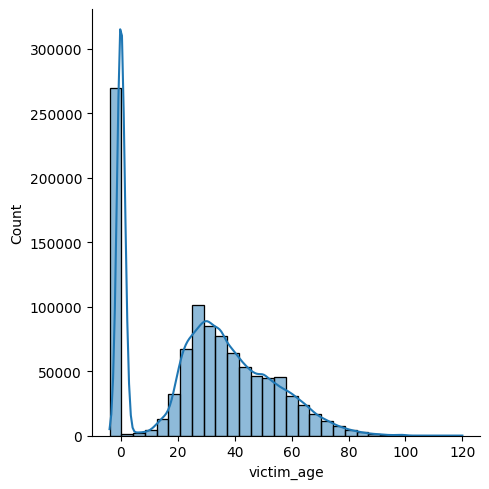

In [33]:
# Visualizing the distribution of the age climn
sns.displot(
    data = crime,
    x = "victim_age",
    kde = True,
    bins = 30
)

As we can see from the graph, 0 is heavily influencing the distribution. So we we drop all values less or equal to 0 and high or greater than 100

In [34]:
# Setting the outlier parameter
age_outlier = (crime["victim_age"] <= 0) | (crime["victim_age"] >= 100)

# Dropping the outliers
crime = crime[~age_outlier]

We also drop all the extreme values with the help of Interquartile Range (IQR)

In [35]:
# Finding the quartiles & IQR
Q1 = crime["victim_age"].quantile(q = 0.25)
Q3 = crime["victim_age"].quantile(q = 0.75)
IQR = Q3 - Q1

# Fixing the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Dropping the outliers
crime = crime[crime["victim_age"].between(left = lower_bound, right = upper_bound)]

Finally, the date and time of occurrence cannot be greater (later) than the date reported.

In [36]:
# Checking the dates of occurrence and report to find any anomaly
(crime["date_time_occurrence"].dt.date > crime["date_reported"].dt.date).sum()

0

No date-related anomaly detected. So we can move on to the next section.

# **<u>Exploratory Data Analysis (EDA)<u>**

Now, after cleaning the dataset, we conduct some exploratory data analysis on the dataset to find out some key insights

## **Summary Statistics**

We take a look at some of the distributions of the columns

In [37]:
# Revisiting the summary statistics
crime[["victim_age", "date_reported", "date_time_occurrence"]].describe().round(decimals = 3)

victim_age                  date_reported  \
count  731256.000                         731256   
mean       39.209  2022-05-01 06:24:53.097902592   
min         2.000            2020-01-01 00:00:00   
25%        28.000            2021-04-07 00:00:00   
50%        36.000            2022-05-14 00:00:00   
75%        50.000            2023-05-25 00:00:00   
max        83.000            2025-03-28 00:00:00   
std        15.133                            NaN   

                date_time_occurrence  
count                         731256  
mean   2022-04-17 22:38:40.541944320  
min              2020-01-01 00:01:00  
25%              2021-03-22 00:30:00  
50%              2022-04-29 17:45:00  
75%              2023-05-11 17:20:00  
max              2025-03-26 06:33:00  
std                              NaN

## **Univariate & Bivariate Analysis**

In [38]:
# We set the style of seaborn
sns.set_style("white")

Let us take a look at the age distribution of the victims.

Text(0.5, 9.444444444444459, 'Victim Age')

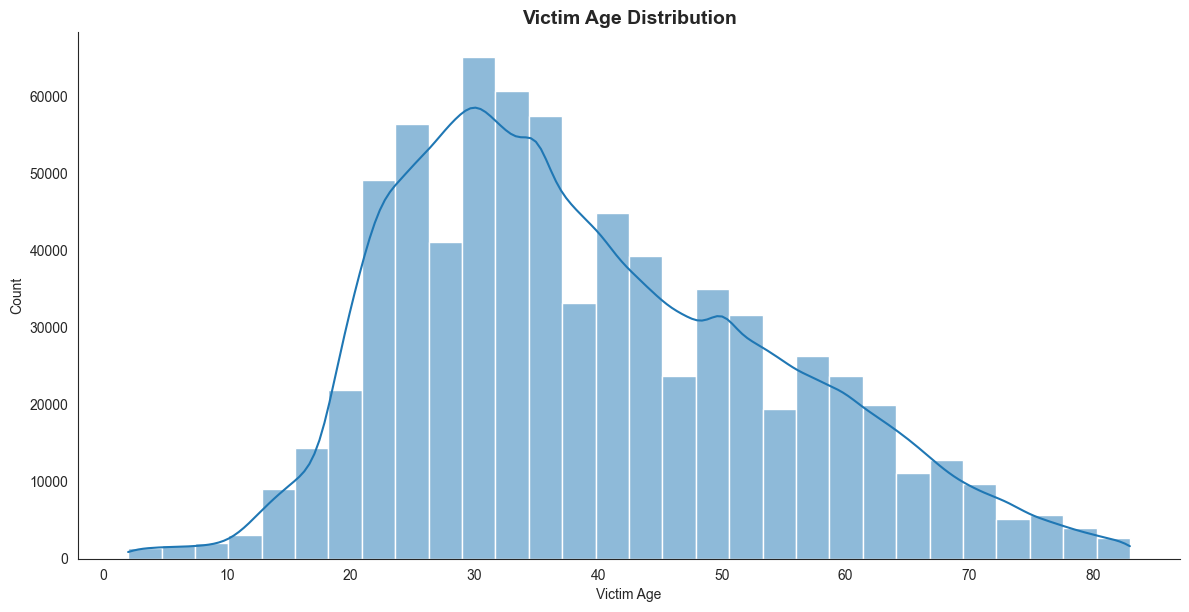

In [39]:
# Distribution of the victim's age
sns.displot(
    data = crime,
    x = "victim_age",
    bins = 30,
    kde = True,
    height = 6,
    aspect = 2
)

# Adding the titles and the axes
plt.title("Victim Age Distribution", fontsize = 14, fontweight = "bold")
plt.xlabel("Victim Age")

The age of the victims is **right-tailed**, meaning the distribution is **positively-skewed**. But not by much. This analysis shows us that younger people were more prone towards victims of crimes in Los Angeles between 2020 and 2025.

Text(0, 0.5, 'Descents')

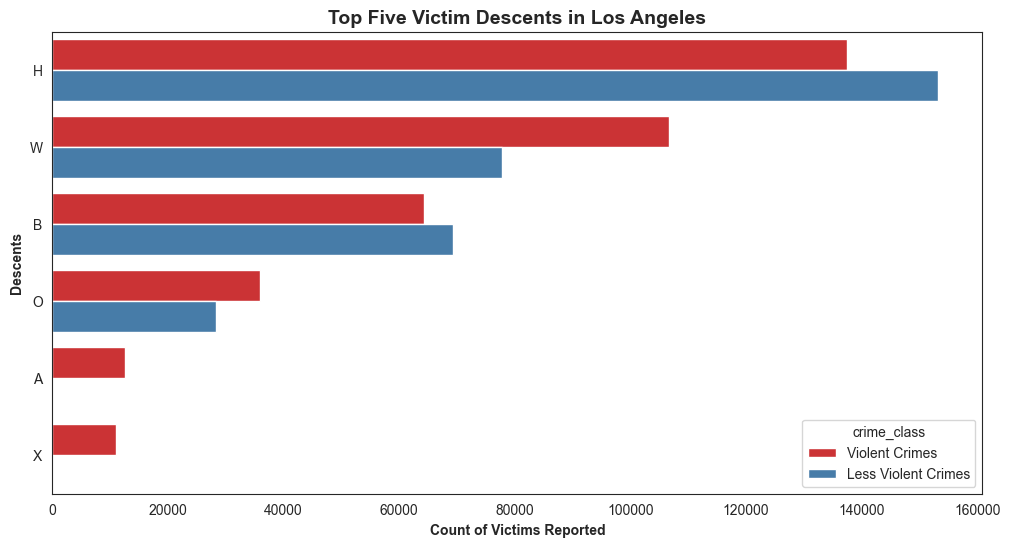

In [40]:
# To see which descent are the most prone to become a victim
top_ten_victims = crime[["victim_descent", "crime_class"]].value_counts().head(n = 10).reset_index()

plt.figure(figsize = (12, 6))
sns.barplot(
    data = top_ten_victims,
    y = "victim_descent",
    x = "count",
    hue = "crime_class",
    order = top_ten_victims["victim_descent"],
    palette = "Set1"
)

# Adding the titles and the axes
plt.title("Top Five Victim Descents in Los Angeles", fontsize = 14, fontweight = "bold")
plt.xlabel("Count of Victims Reported", fontweight = "bold")
plt.ylabel("Descents", fontweight = "bold")

The "**H**" descents are the most recorded victim group of **both violent and less violent crimes** in Los Angeles.

Text(0, 0.5, 'Sex')

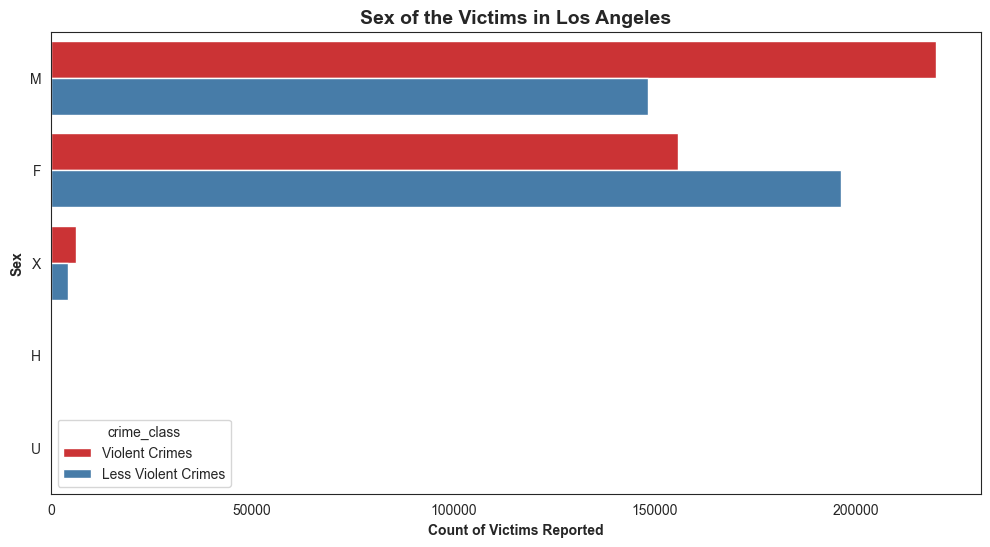

In [41]:
# To see a sex-wise count of victims
plt.figure(figsize = (12, 6))
sns.countplot(
    data = crime,
    y = "victim_sex",
    order = crime['victim_sex'].value_counts().index,
    hue = "crime_class",
    palette = "Set1"
)

# Adding the titles and the axes
plt.title("Sex of the Victims in Los Angeles", fontsize = 14, fontweight = "bold")
plt.xlabel("Count of Victims Reported", fontweight = "bold")
plt.ylabel("Sex", fontweight = "bold")

From the above barchart we can say that, **males** are the most common victims of **violent crimes** whereas **females** are the most common victims of **less violent crimes**. Overall, males face the most violence.

Text(0, 0.5, 'Crimes')

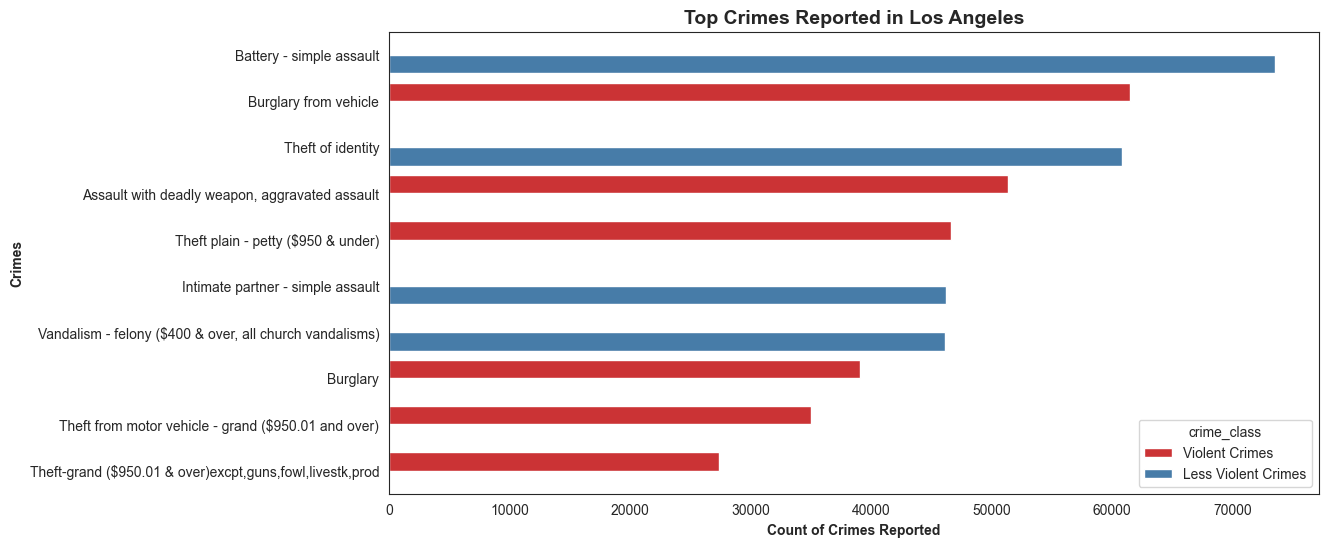

In [42]:
# To see which crimes have been the most recorded
top_crimes = crime[["crime_description", "crime_class"]].value_counts().head(n = 10).reset_index().query("crime_description != 'Other'")
plt.figure(figsize = (12, 6))
sns.barplot(
    data = top_crimes,
    y = "crime_description",
    x = "count",
    order = top_crimes["crime_description"],
    hue = "crime_class",
    palette = "Set1"
)

# Adding the titles and the axes
plt.title("Top Crimes Reported in Los Angeles", fontsize = 14, fontweight = "bold")
plt.xlabel("Count of Crimes Reported", fontweight = "bold")
plt.ylabel("Crimes", fontweight = "bold")

From this barchart, we can see that the most number of recorded **less violent crimes** is **battery — simple assault** and the count of highest recorded **violent crime** is **burglary from vehicle**.

Text(0, 0.5, 'Area')

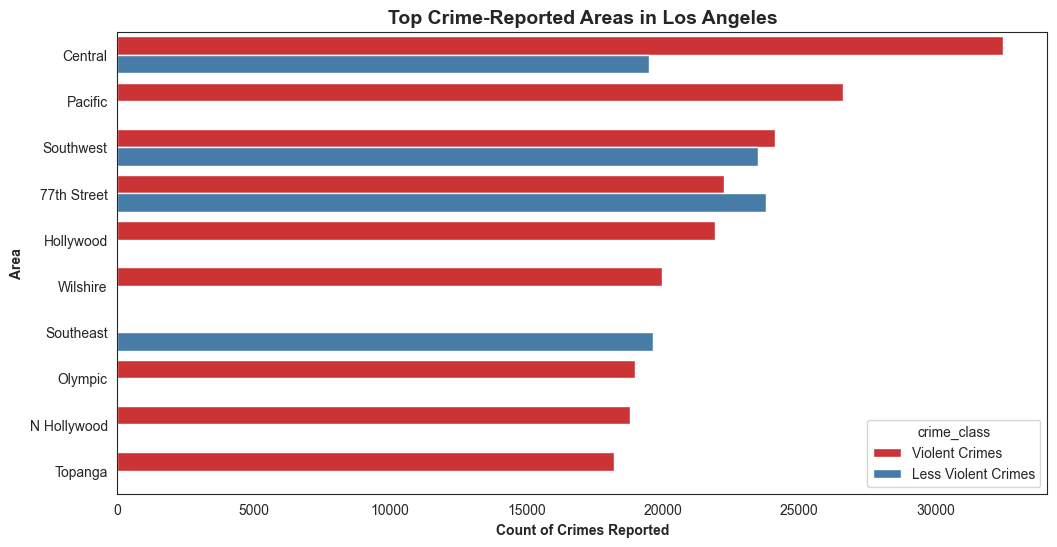

In [43]:
# To see which areas have the most crime
crime_by_area = crime[["area", "crime_class"]].value_counts().head(n = 13).reset_index()
plt.figure(figsize = (12, 6))
sns.barplot(
    data = crime_by_area,
    y = "area",
    x = "count",
    order = crime_by_area["area"],
    hue = "crime_class",
    palette = "Set1"
)

# Adding the titles and the axes
plt.title("Top Crime-Reported Areas in Los Angeles", fontsize = 14, fontweight = "bold")
plt.xlabel("Count of Crimes Reported", fontweight = "bold")
plt.ylabel("Area", fontweight = "bold")

So, from the above barchart we can see that **Central** is area where most **violent crime** and **77th Street** is where the most **less violent crimes** are reported. It is important to remember that this chart does not imply that Central has a high violent or Southwest has a high less violent crime rate. It simply means that Central and Southwest has the most crime reported.

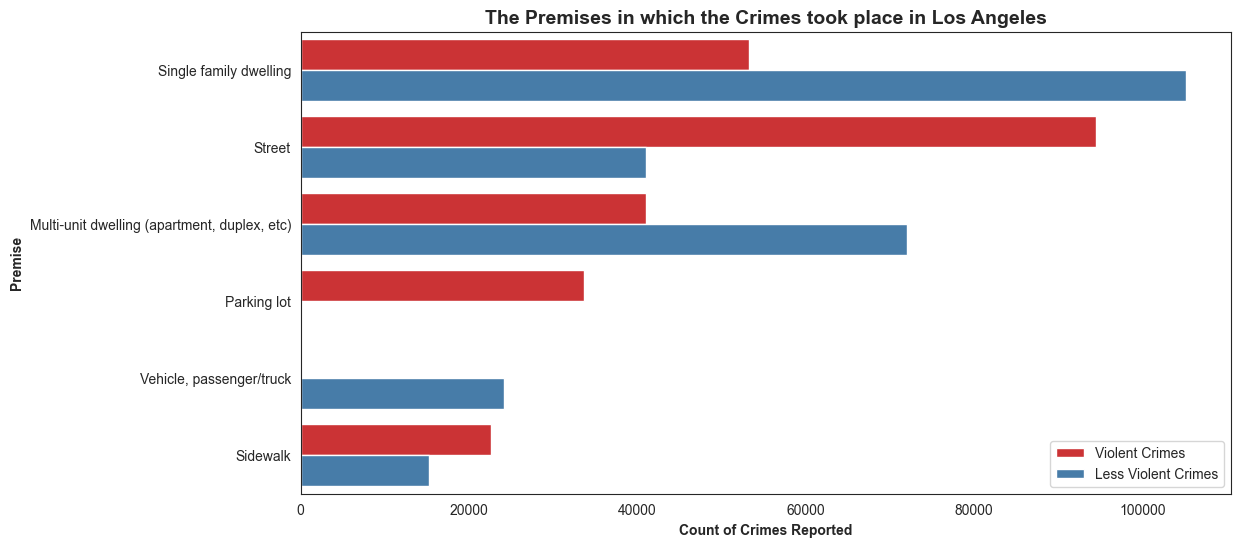

In [44]:
# To see the premises in which the crime took place
crime_by_premise = crime[["premise", "crime_class"]].value_counts().head(10).reset_index()
plt.figure(figsize = (12, 6))
sns.barplot(
    data = crime_by_premise,
    y = "premise",
    x = "count",
    order = crime_by_premise["premise"],
    hue = "crime_class",
    palette = "Set1"
)

# Adding the titles and the axes
plt.title("The Premises in which the Crimes took place in Los Angeles", fontsize = 14, fontweight = "bold")
plt.xlabel("Count of Crimes Reported", fontweight = "bold")
plt.ylabel("Premise", fontweight = "bold")
plt.legend(loc = 4)

From the graph we can see that, the most number of violent crimes took place in the **streets** whereas a most of the less violent crimes took place in **single family dwellings**.

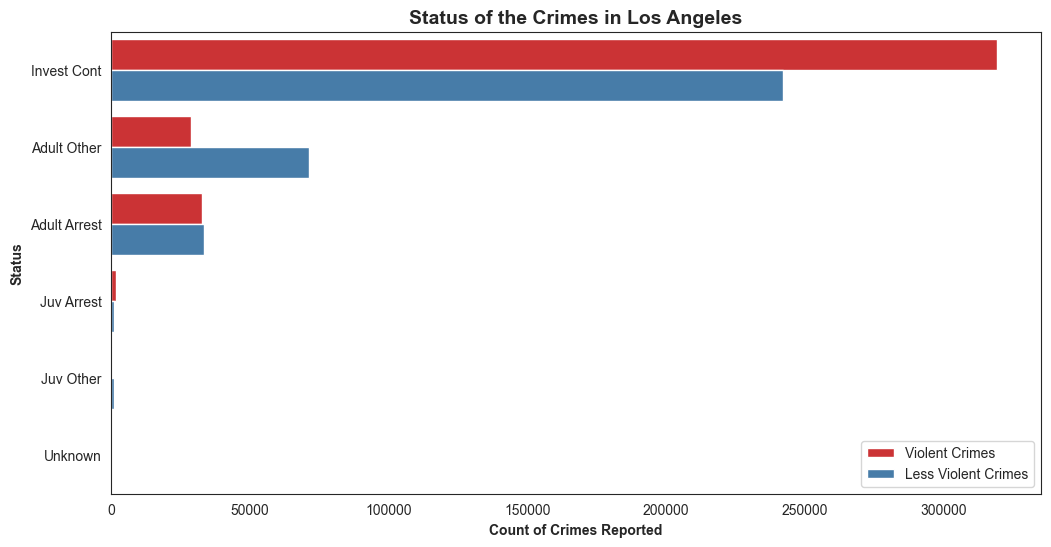

In [45]:
# To see the status of the crimes
crime_by_status = crime[["status", "crime_class"]].value_counts().reset_index()
plt.figure(figsize = (12, 6))
sns.barplot(
    data = crime_by_status,
    y = "status",
    x = "count",
    order = crime_by_status["status"],
    hue = "crime_class",
    palette = "Set1"
)

# Adding the titles and the axes
plt.title("Status of the Crimes in Los Angeles", fontsize = 14, fontweight = "bold")
plt.xlabel("Count of Crimes Reported", fontweight = "bold")
plt.ylabel("Status", fontweight = "bold")
plt.legend(loc = 4)

As can be shown from the graph above, most of the crimes are still under investigation. Compared to this, the number of arrests and other procedures are very few.

## **Time-Series Analysis**

To conduct time series analysis, we need to extract the time components from the dataset.

In [46]:
# Making a copy of the dataset and working on that
time_series_analysis = crime.copy()

# Extracting the time components
time_series_analysis["hours"] = time_series_analysis["date_time_occurrence"].dt.hour
time_series_analysis["day"] = time_series_analysis["date_time_occurrence"].dt.day_name()
time_series_analysis["month"] = time_series_analysis["date_time_occurrence"].dt.month_name()
time_series_analysis["year"] = time_series_analysis["date_time_occurrence"].dt.year

We can see from the graph that the highest number of crimes took place at **1200 hours** and the lowest amount of crime at **0500 hours**.

Text(0, 0.5, 'Count of Crimes Occurred')

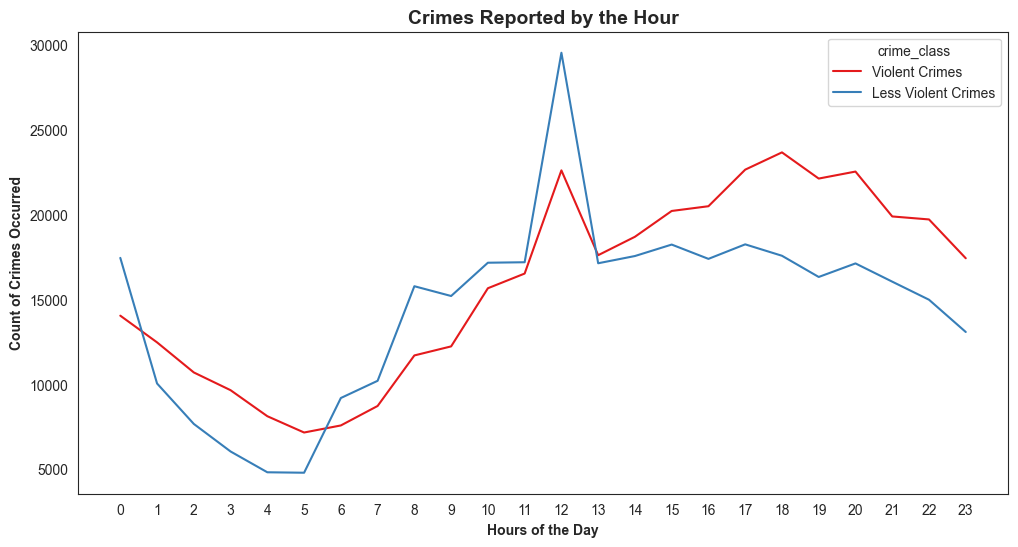

In [47]:
# Crime by the time of the day
hourly_crime_rate = time_series_analysis[["hours", "crime_class"]].value_counts().reset_index()
hourly_crime_rate

# Plotting the graph
plt.figure(figsize = (12, 6))
sns.lineplot(
    data = hourly_crime_rate,
    x = "hours",
    y = "count",
    hue = "crime_class",
    palette = "Set1"
)

# Adding the titles, the axes, and fixing the tick marks
plt.xticks(range(0,24))
plt.title("Crimes Reported by the Hour", fontsize = 14, fontweight = "bold")
plt.xlabel("Hours of the Day", fontweight = "bold")
plt.ylabel("Count of Crimes Occurred", fontweight = "bold")

Text(0, 0.5, 'Days of the Week')

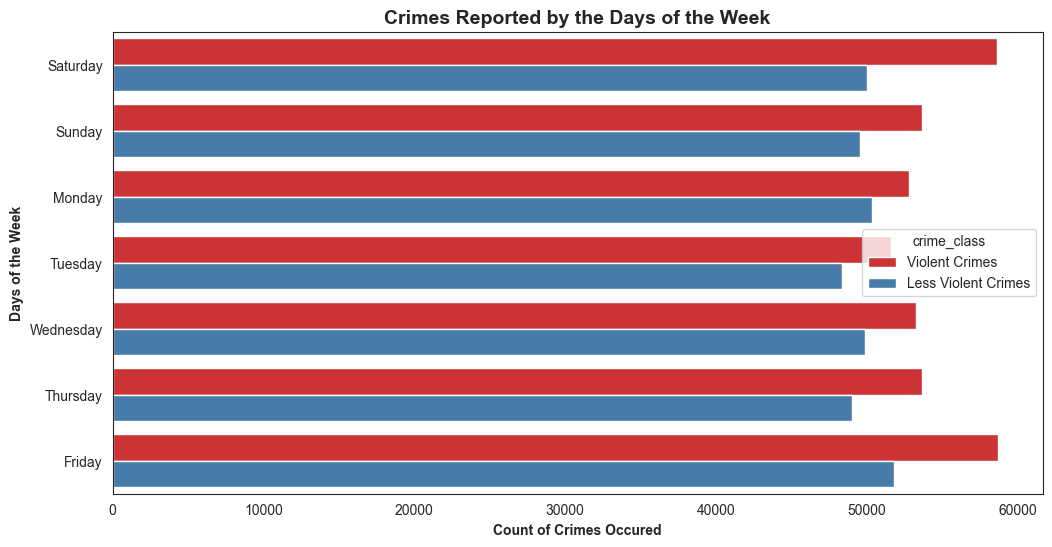

In [48]:
# Crime by the days of the weeks
daily_crime_rate = time_series_analysis[["day", "crime_class"]].value_counts().reset_index()
daily_crime_rate.sort_values(by = "count", ascending = False, inplace = True)
daily_crime_rate

# Plotting the graph
plt.figure(figsize = (12, 6))
sns.barplot(
    data = daily_crime_rate,
    y = "day",
    x = "count",
    hue = "crime_class",
    order = ["Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"],
    palette = "Set1"
)

# Adding the titles, the axes, and fixing the tick marks
plt.title("Crimes Reported by the Days of the Week", fontsize = 14, fontweight = "bold")
plt.xlabel("Count of Crimes Occured", fontweight = "bold")
plt.ylabel("Days of the Week", fontweight = "bold")

From the graph, we cans see that the amount of crime taking place is almost the same each day of the week.

Text(0, 0.5, 'Months of the Year')

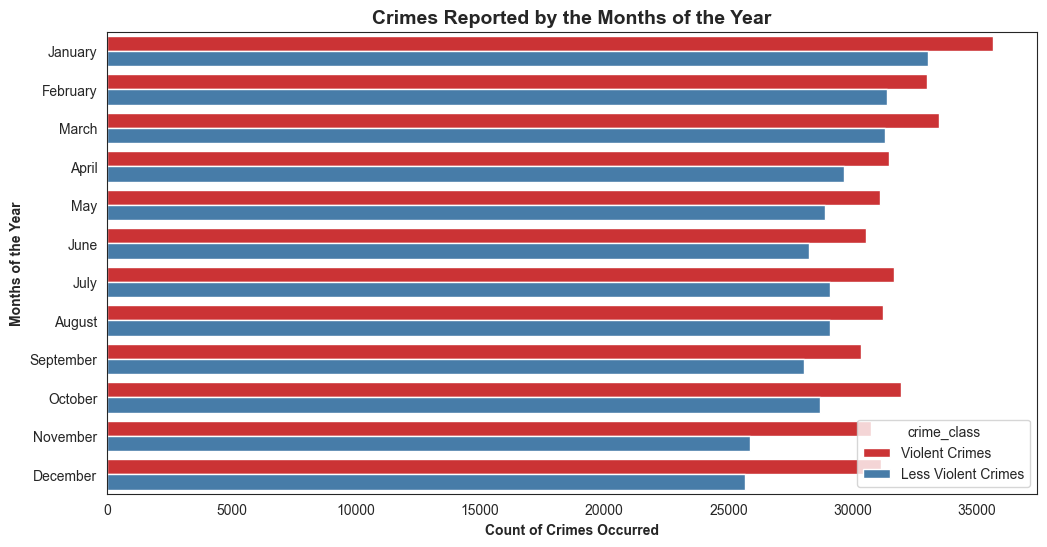

In [49]:
# Crime by the months of the year
monthly_crime_rate = time_series_analysis[["month", "crime_class"]].value_counts().reset_index()
monthly_crime_rate

# Plotting the graph
plt.figure(figsize = (12, 6))
sns.barplot(
    data = monthly_crime_rate,
    y = "month",
    x = "count",
    hue = "crime_class",
    order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"],
    palette = "Set1"
)

# Adding the titles, the axes, and fixing the tick marks
plt.title("Crimes Reported by the Months of the Year", fontsize = 14, fontweight = "bold")
plt.xlabel("Count of Crimes Occurred", fontweight = "bold")
plt.ylabel("Months of the Year", fontweight = "bold")

From the graph, we cans see that the amount of crime taking place is also almost the same each month of the year.

Text(0, 0.5, 'Number of Crimes Occurred')

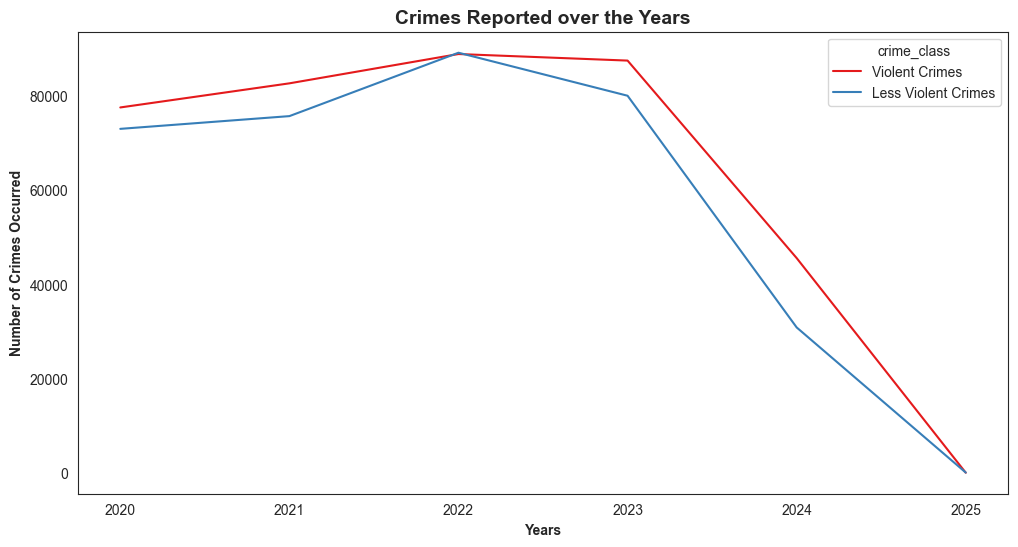

In [50]:
# Crime by the months of the year
yearly_crime_rate = time_series_analysis[["year", "crime_class"]].value_counts().reset_index()
yearly_crime_rate

# Plotting the graph
plt.figure(figsize = (12, 6))
sns.lineplot(
    data = yearly_crime_rate,
    x = "year",
    y = "count",
    hue = "crime_class",
    palette = "Set1"
)

# Adding the titles, the axes, and fixing the tick marks
plt.title("Crimes Reported over the Years", fontsize = 14, fontweight = "bold")
plt.xlabel("Years", fontweight = "bold")
plt.ylabel("Number of Crimes Occurred", fontweight = "bold")

From the above graph, we can see that the number of crime rate **drop** from the year 2020 to 2025.

Let us visualise the number of crimes taking place at different times of the day and different days of the week with the help of a heatmap.

Text(195.72222222222223, 0.5, 'Day of Week')

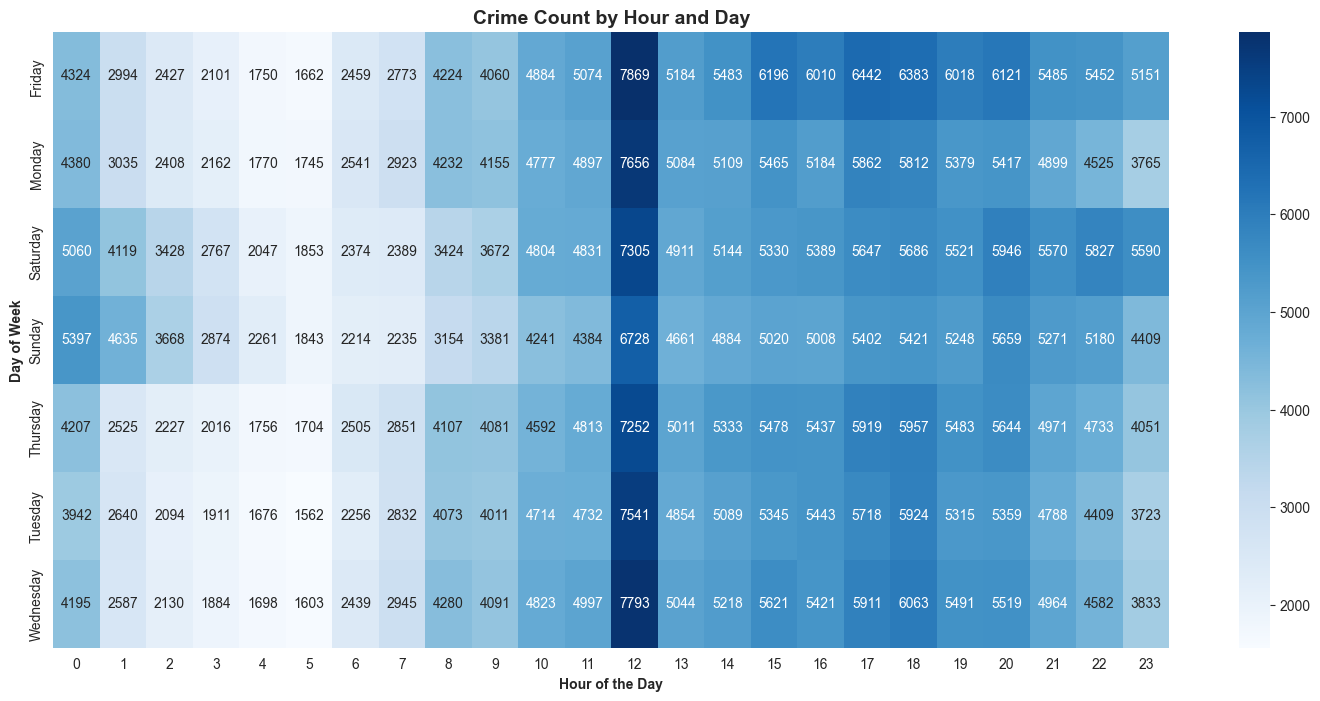

In [51]:
# Creating the dataset and converting it into wide format
heatmap_data_hour_day = time_series_analysis.groupby(["hours", "day"]).size().reset_index(name = "crime_count").pivot(
    index = "day",
    columns = "hours",
    values = "crime_count"
)

# Plotting the data
plt.figure(figsize = (18, 8))
sns.heatmap(
    data = heatmap_data_hour_day,
    cmap = "Blues",
    annot = True,
    fmt = "d"
)

# Adding the titles, the axes, and fixing the tick marks
plt.title("Crime Count by Hour and Day", fontsize = 14, fontweight = "bold")
plt.xlabel("Hour of the Day", fontweight = "bold")
plt.ylabel("Day of Week", fontweight = "bold")

Similarly, let us visualise the number of crimes taking place at different times of the day and different days of the week with the help of a heatmap.

Text(270.72222222222223, 0.5, 'Month of the Year')

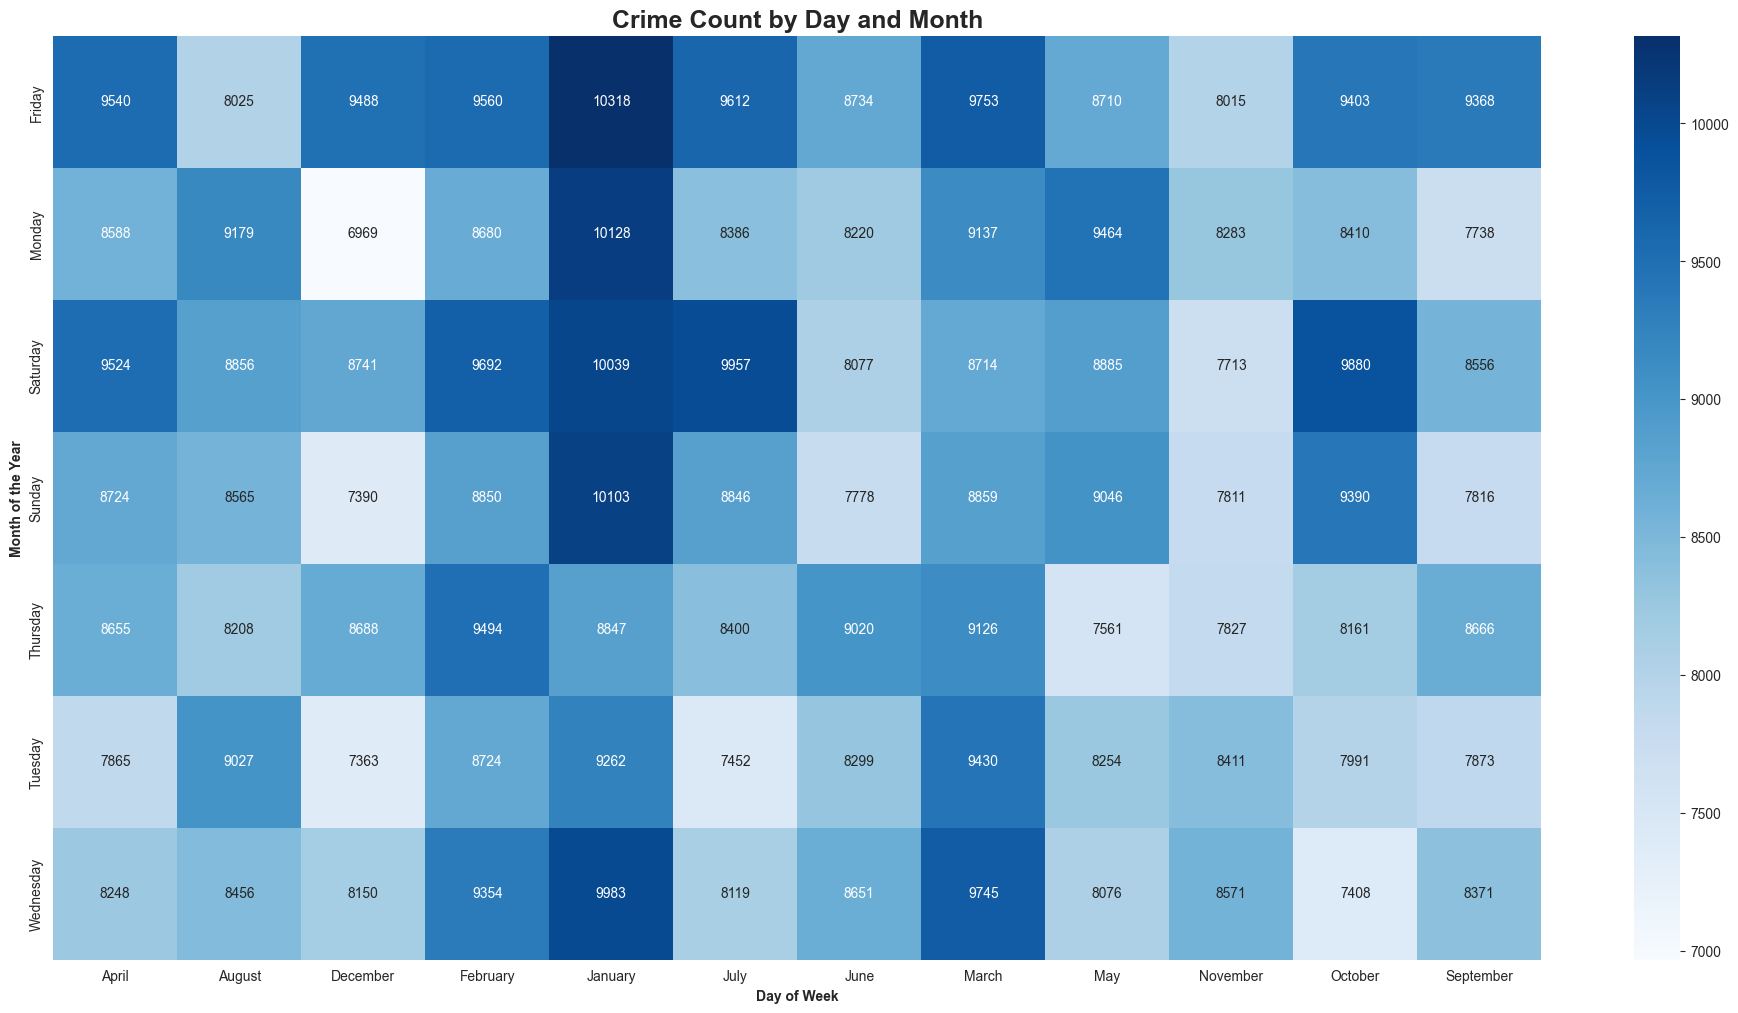

In [52]:
# Creating the dataset and converting it into wide format
heatmap_data_day_month = time_series_analysis.groupby(["month", "day"]).size().reset_index(name = "crime_count").pivot(
    index = "day",
    columns = "month",
    values = "crime_count"
)

# Plotting the data
plt.figure(figsize = (24, 12))
sns.heatmap(
    data = heatmap_data_day_month,
    cmap = "Blues",
    annot = True,
    fmt = "d"
)

# Adding the titles, the axes, and fixing the tick marks
plt.title("Crime Count by Day and Month", fontsize = 18, fontweight = "bold")
plt.xlabel("Day of Week", fontweight = "bold")
plt.ylabel("Month of the Year", fontweight = "bold")

# **<u>Machine Learning Models<u>**

Now, after cleaning the data and conducting some exploratory data analysis, we can apply some machine learning model.

## **Preparing the Data for Modelling**

### Dropping Unnecessary Columns & Modifying Some Existing Ones

Firstly, we need to drop a few columns because they don't bring any value to our models and hence we don't need them. Beside this, some of the columns have too many unique values which can crash our model.

In [53]:
# Checking the number of unique values in each column
crime.nunique()

id                      731256
date_reported             1878
area                        21
crime_class                  2
crime_description          138
victim_age                  82
victim_sex                   5
victim_descent              19
premise                    305
status                       6
location                 61873
date_time_occurrence    311791
dtype: int64

From the above data, we can drop id as it doesn't add any value to our model. We also drop `date_reported`, `date_time_occurrence`, and `location` as they have too many values which will crash our model. Some special treatment will be provided for the crime and premise column to bring down the number of values (suggestion taken from ChatGPT and Claude).

In [54]:
# Dropping the columns
cols_to_drop_ml = [
    "id",
    "date_reported",
    "date_time_occurrence",
    "location"
]
crime_for_ml = crime.drop(columns = cols_to_drop_ml)

For the crime and premise columns, we only keep the top 10 values and convert the rest of the values into unknown. We only keep the top 10 because the share of the top 10 crime count is **around 67%** of the total entries and top 10 premise is **around 79%** of the total number of premises.

In [55]:
# Extracting the top 10 crime values
top_ten_crimes = crime_for_ml['crime_description'].value_counts().head(n = 10).index

# Changing the values of the column
crime_for_ml["crime_description"] = crime_for_ml["crime_description"].apply(
    lambda column: column if column in top_ten_crimes else "Other"
)

# Doing the same thing for the premise column
top_ten_premises = crime_for_ml['premise'].value_counts().head(n = 10).index

# Changing the values of the column
crime_for_ml["premise"] = crime_for_ml["premise"].apply(
    lambda col: col if col in top_ten_premises else "Other"
)

In [56]:
# Re-checking the unique values now
crime_for_ml.nunique()

area                 21
crime_class           2
crime_description    11
victim_age           82
victim_sex            5
victim_descent       19
premise              11
status                6
dtype: int64

### Numeric Column Scaling

The `victim_age` column needs to be scaled if we want to efficiently run through the models. One way of scaling the data is **MinMax Scaling**.

In [57]:
# Determining the minimum and maximum values of age
age_min = crime["victim_age"].min()
age_max = crime["victim_age"].max()
age_max_min = age_max - age_min

# Scaling the victim_age column
crime_for_ml["victim_age"] = ((crime_for_ml["victim_age"] - age_min) / age_max_min).round(decimals = 3)

### Dummy Encoding

Now, the dataset is ready for dummy encoding.

In [58]:
# Dummy Encoding the dataset
crime_dummy = pd.get_dummies(data = crime_for_ml, drop_first = True)

In [59]:
# Specifying the X and y columns
X = crime_dummy.drop(columns = "crime_class_Less Violent Crimes")
y = crime_dummy["crime_class_Less Violent Crimes"].astype("int")

Now, we do a train-test split to evaluate the performance of a machine learning model on unseen data.

In [60]:
# Doing a 70:30 train-test split on the dataset
from sklearn.model_selection import train_test_split

# Defining the variables
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
    stratify = y,
    random_state = 49
)

There are lots of machine learning classification models in python. Going through all of them is not feasible nor is appropriate for what we want to achieve. So, I have selected a few models that I think will be appropriate for this job. These models cover more or less all types of classification categories such as tree-based models, ensemble methods, boosting algorithms, naive bayes, and linear models. These models are:
1. Logistic Regression
2. Support Vector Machine (SVM)
3. Decision Tree Classifier
4. Random Forest Classifier
5. XGBoost
6. KNN Classifier
7. Gaussian Naive Bayes

## **Logistic Regression**

### Running the Model

In [61]:
# Importing the necessary library for conducting logistic regression
from sklearn.linear_model import LogisticRegression

# Fitting the model for logistic regression
log_model = LogisticRegression(
    solver = "newton-cholesky",
    max_iter = 1000,
    random_state = 49
)
log_model.fit(X = X_train, y = y_train)

LogisticRegression(max_iter=1000, random_state=49, solver='newton-cholesky')

In [62]:
# Predicting the target
y_predict_log = log_model.predict(X = X_test)

### Performance & Evaluation

In [63]:
# Calculating the accuracy
from sklearn.metrics import accuracy_score
accuracy_log = round(
    accuracy_score(y_true = y_test, y_pred = y_predict_log), ndigits = 4
)
print(f"The accuracy of the model is {accuracy_log * 100}%. This means that about 9 out of 10 predictions are correct, which means it is a very good.")

The accuracy of the model is 89.63%. This means that about 9 out of 10 predictions are correct, which means it is a very good.


Now let us create the confusion matrix.

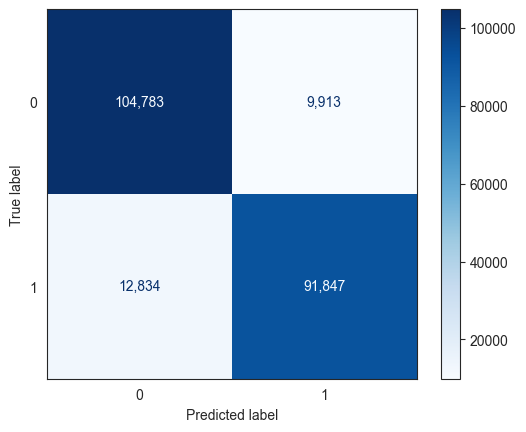

In [64]:
# Importing the confusion matrix module
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Creating the confusion matrix & converting it to a dataframe
confusion_matrix_log = confusion_matrix(y_true = y_test, y_pred = y_predict_log)
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_log).plot(cmap = "Blues", values_format = ",.0f")

Now, time for the Receiver Operating Characteristic (**ROC**) Curve and the ROC AUC score.

Text(0, 0.5, 'True Positive Rate')

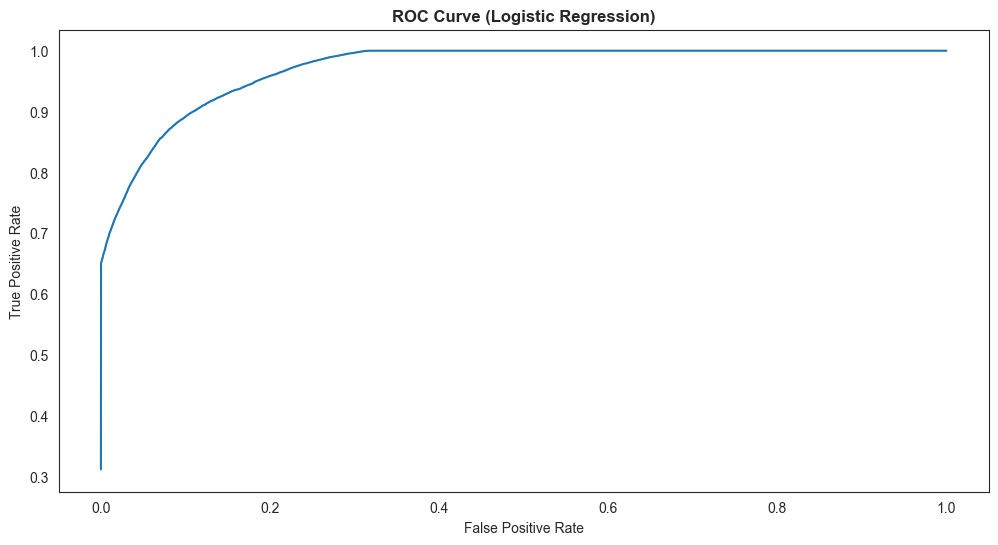

In [65]:
# Importing the ROC curve
from sklearn.metrics import roc_curve

# First convert the values into probability scores
y_prob_log = log_model.predict_proba(X = X_test)
fpr_log, tpr_log, thresholds_log = roc_curve(
    y_true = y_test,
    y_score = y_prob_log[:, 1]
)

# Plotting the ROC curve
plt.figure(figsize = (12, 6))
sns.lineplot(x = fpr_log, y = tpr_log,)

# Customizing the plot
plt.title("ROC Curve (Logistic Regression)", fontweight = "bold")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [66]:
# Getting the ROC score
from sklearn.metrics import roc_auc_score
roc_score_log = round(roc_auc_score(
    y_true = y_test,
    y_score = y_prob_log[:, 1]
    ), ndigits = 4
)
print(f"The area under the curve is {roc_score_log * 100}%. This score implies that my model has strong discriminative power and is an excellent model.")

The area under the curve is 97.11%. This score implies that my model has strong discriminative power and is an excellent model.


### Remarks

In [67]:
# Summary information in a mini report format
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_log))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90    114696
           1       0.90      0.88      0.89    104681

    accuracy                           0.90    219377
   macro avg       0.90      0.90      0.90    219377
weighted avg       0.90      0.90      0.90    219377



The logistic regression model demonstrates strong performance in classifying crimes. For class 0 (less violent crimes), it achieved a **precision of 0.89** and **recall of 0.91**, indicating that most predicted class 0 cases were correct and that the model successfully identified the majority of actual class 0 instances. For class 1 (violent crimes), the model attained a **precision of 0.90** and **recall of 0.88**, showing high correctness of predicted class 1 cases while capturing a substantial portion of actual class 1 instances. Lastly, the model achieved an **F1-score of 0.90** for class 0 and **0.89** for class 1, indicating a good balance between precision and recall for both crime classes.

Overall, the logistic regression model achieved an accuracy of **89.63%**, correctly classifying nearly 9 out of 10 cases. Its ROC AUC of **97.11%** indicates excellent ability to discriminate between the two crime classes (violent and less violent), further supporting its reliability.

## **Support Vector Machine (SVM)**

### Running the Model

In [68]:
# Importing the necessary library for conducting support vector machine
from sklearn.svm import SVC

# Fitting the model for logistic regression
svm_model = SVC(
    max_iter = 2000, 
    random_state = 49
)
svm_model.fit(X = X_train, y = y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(max_iter=2000, random_state=49)

In [69]:
# Predicting the target
y_predict_svm = svm_model.predict(X = X_test)

### Performance & Evaluation

First, let's measure the accuracy of the model.

In [70]:
# Calculating the accuracy
accuracy_svm = round(
    accuracy_score(y_true = y_test, y_pred = y_predict_svm), ndigits = 3
)
print(f"The accuracy of the model is {accuracy_svm * 100}%. This means that only around 6 out of 10 predictions are correct, which is also slightly more than random guessing (50% probability of getting is correct), i.e., not using a model.")

The accuracy of the model is 65.2%. This means that only around 6 out of 10 predictions are correct, which is also slightly more than random guessing (50% probability of getting is correct), i.e., not using a model.


Now, let us generate the confusion matrix.

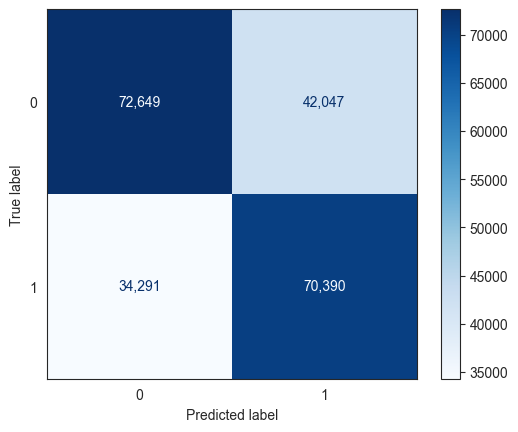

In [71]:
# Creating the confusion matrix & converting it to a dataframe
confusion_matrix_svm = confusion_matrix(y_true = y_test, y_pred = y_predict_svm)
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_svm).plot(cmap = "Blues", values_format = ",.0f")

No ROC Curve and ROC AUC was generated for the SVM because of the following errors:

```Python
AttributeError: predict_proba is not available when probability = False
The above exception was the direct cause of the following

AttributeError: This 'SVC' has no attribute 'predict_proba'
```

And fixing this takes the model forever to run.

### Remarks

In [72]:
# Summary information in a report format
print(classification_report(y_test, y_predict_svm))

              precision    recall  f1-score   support

           0       0.68      0.63      0.66    114696
           1       0.63      0.67      0.65    104681

    accuracy                           0.65    219377
   macro avg       0.65      0.65      0.65    219377
weighted avg       0.65      0.65      0.65    219377



The SVM model (maximum iterations = 2000) shows relatively **poor performance** on classifying crimes. For class 0 (less violent crimes), it achieved a **precision of 0.68** and **recall of 0.63**, indicating that while a majority of the predicted class 0 cases were correct, the model missed a notable portion of actual class 0 instances. For class 1 (violent crimes), it attained a **precision of 0.63** and **recall of 0.67**, showing that the model captured a fair number of actual class 1 cases while maintaining moderate correctness in its predictions. Lastly, the model achieved an **F1-score of 0.66** for class 0 and **0.65** for class 1, reflecting a more balanced performance across both classes compared to before.

Overall, the model achieved an **accuracy of 65.2%**, reflecting that its predictions are slightly better than random guessing but still leave considerable room for improvement.

## **Decision Tree Classifier**

### Running the Model

In [73]:
# Importing the necessary module
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Fitting the model
clf_model = DecisionTreeClassifier(
    max_depth = 8, 
    random_state = 49
)
clf_model.fit(X = X_train, y = y_train)

DecisionTreeClassifier(max_depth=8, random_state=49)

In [74]:
# Predicting the target
y_predict_clf = clf_model.predict(X = X_test)

Text(0.5, 1.0, 'Decision Tree Model (Depth = 8)')

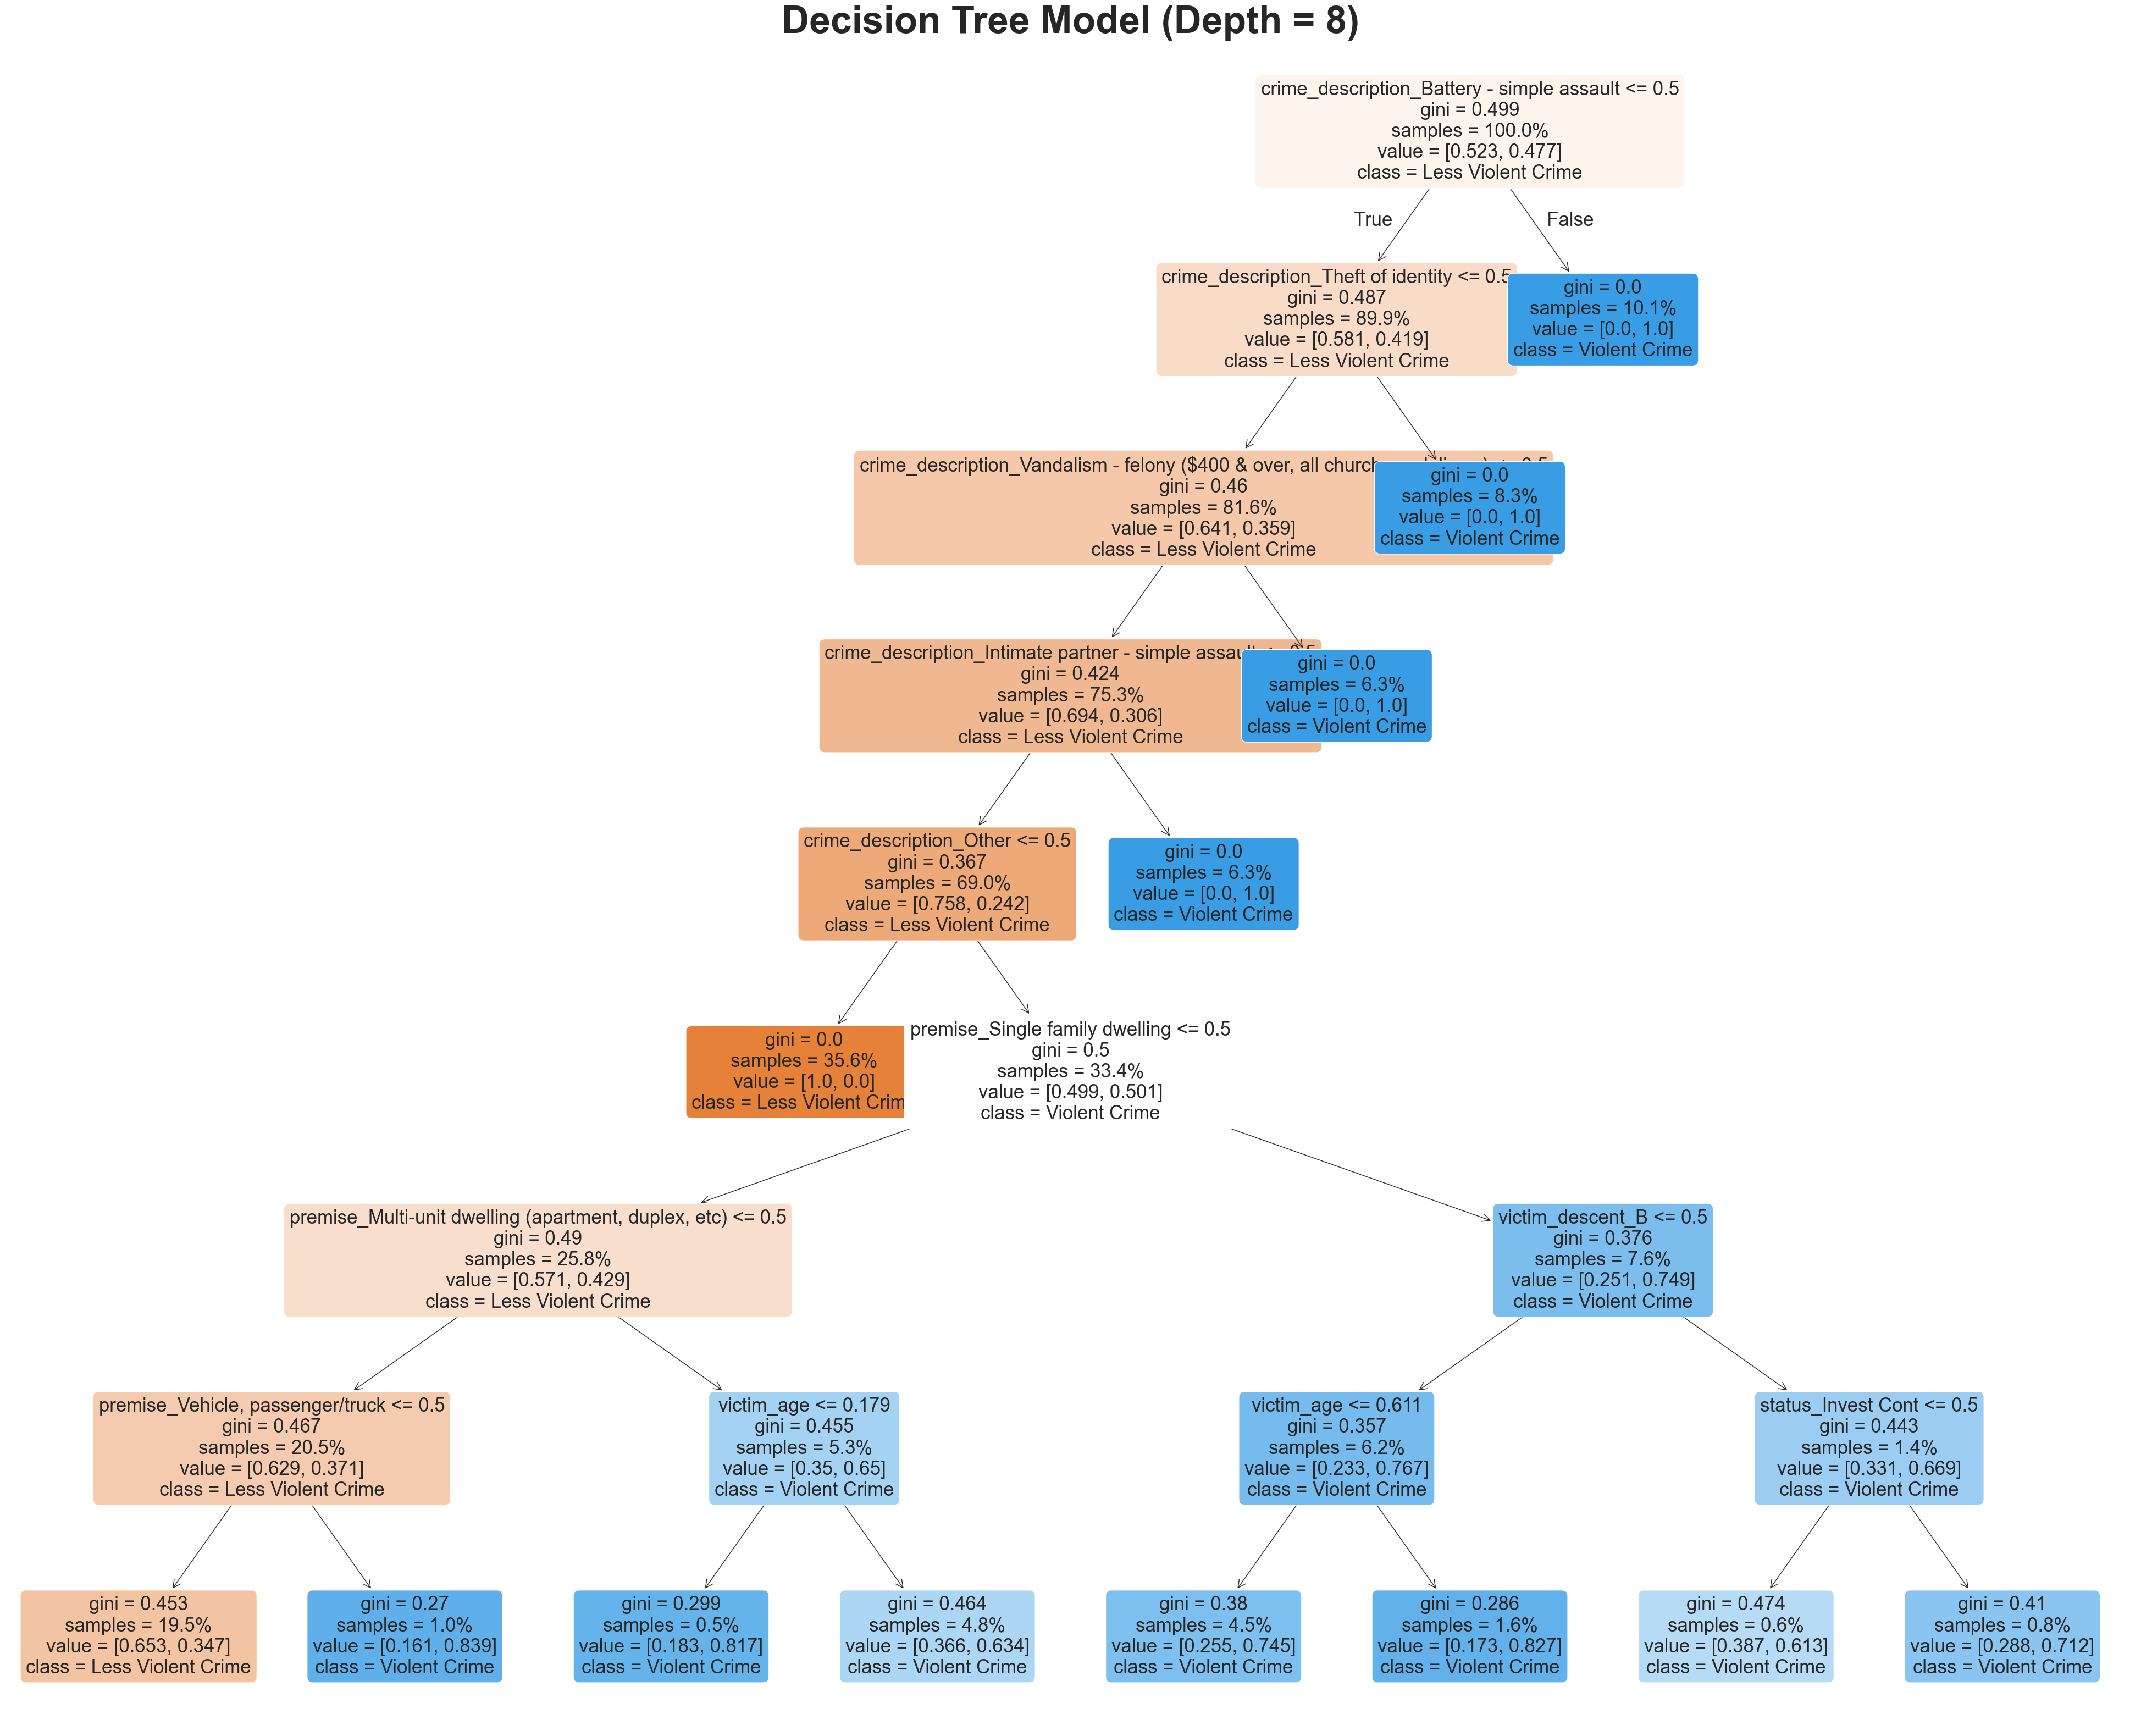

In [75]:
# Fixing the plot size
plt.figure(figsize=(50, 40))

# Plotting the tree
plot_tree(
    decision_tree = clf_model,
    rounded = True,
    filled = True,
    feature_names = X_train.columns,
    class_names = ["Less Violent Crime", "Violent Crime"],
    proportion = True,
    fontsize = 25
)
plt.title ("Decision Tree Model (Depth = 8)", fontsize = 50, fontweight = "bold")

### Performance & Evaluation

First, we measure the accuracy score of the model.

In [76]:
# Calculating the accuracy
accuracy_clf = round(
    accuracy_score(y_true = y_test, y_pred = y_predict_clf), ndigits = 4
)
print(f"The accuracy of the model is {accuracy_clf * 100}%. This means that about 9 out of 10 predictions are correct, which is the telltale sign of a very good model.")

The accuracy of the model is 89.25%. This means that about 9 out of 10 predictions are correct, which is the telltale sign of a very good model.


Then, we generate the confusion matrix.

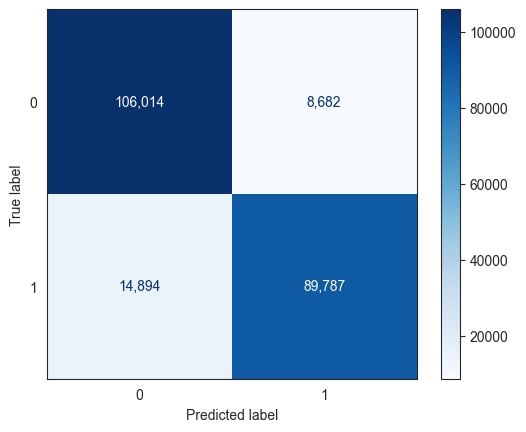

In [77]:
# Creating the confusion matrix & converting it to a dataframe
confusion_matrix_clf = confusion_matrix(y_true = y_test, y_pred = y_predict_clf)
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_clf).plot(cmap = "Blues", values_format = ",.0f")

Now, we create re ROC curve and the area under the curve.

Text(0, 0.5, 'True Positive Rate')

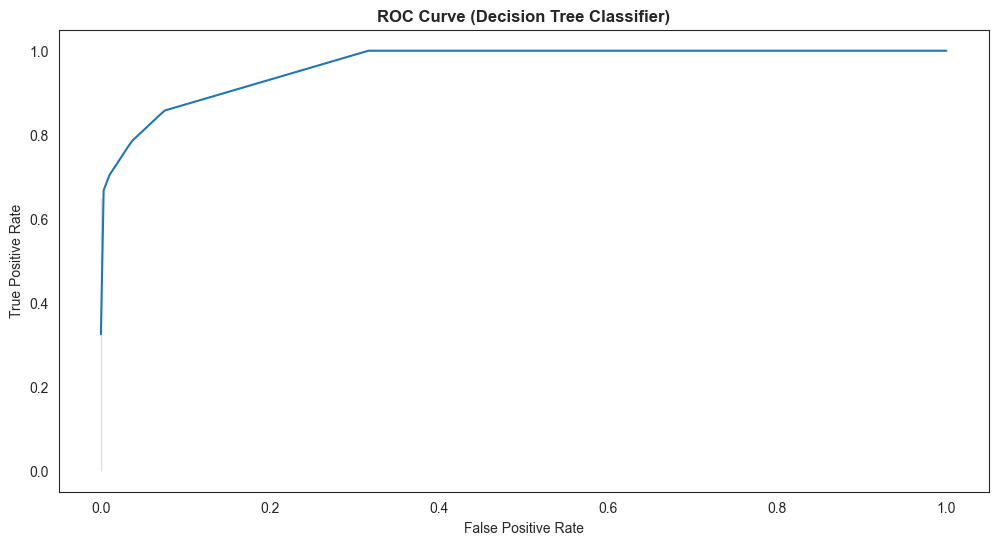

In [78]:
# First convert the values into probability scores
y_prob_clf = clf_model.predict_proba(X = X_test)
fpr_clf, tpr_clf, thresholds_clf = roc_curve(
    y_true = y_test,
    y_score = y_prob_clf[:, 1]
)

# Plotting the ROC curve
plt.figure(figsize = (12, 6))
sns.lineplot(x = fpr_clf, y = tpr_clf)

# Customizing the plot
plt.title("ROC Curve (Decision Tree Classifier)", fontweight = "bold")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [79]:
# Getting the ROC score
roc_score_clf = round(roc_auc_score(
    y_true = y_test,
    y_score = y_prob_clf[:, 1]
    ), ndigits = 4
)
print(f"The area under the curve is {roc_score_clf * 100}%. This score implies that my model has excellent discriminative power and is an excellent model.")

The area under the curve is 96.59%. This score implies that my model has excellent discriminative power and is an excellent model.


### Remarks

In [80]:
# Summary information in a report format
print(classification_report(y_test, y_predict_clf))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90    114696
           1       0.91      0.86      0.88    104681

    accuracy                           0.89    219377
   macro avg       0.89      0.89      0.89    219377
weighted avg       0.89      0.89      0.89    219377



The Decision Tree model (maximum depth = 8) demonstrates strong performance in classifying crimes. For class 0 (less violent crimes), it achieved a **precision of 0.88** and **recall of 0.92**, indicating that most predicted class 0 cases were correct and that the model successfully identified the majority of actual class 0 instances. For class 1, the model attained a **precision of 0.91** and **recall of 0.86**, showing high correctness of predicted class 1 cases while capturing a substantial portion of actual class 1 instances. Lastly, the model achieved an **F1-score of 0.90** for class 0 and **0.88** for class 1, showing a strong balance between correctly predicting each class and minimizing false predictions.

Overall, the decision tree model model achieved an **accuracy of 89.25%**, correctly classifying nearly 9 out of 10 cases. Its ROC **AUC of 96.59%** indicates excellent ability to discriminate between the two crime classes (violent and less violent), further supporting its reliability of distinguishing between violent and less violent crimes.

## Random Forest Classifier

### Running the Model

In [81]:
# Importing the necessary module
from sklearn.ensemble import RandomForestClassifier

# Fitting the model
rfc_model = RandomForestClassifier(
    n_estimators = 500,
    max_depth = 25,
    random_state = 49
)
rfc_model.fit(X = X_train, y = y_train)

RandomForestClassifier(max_depth=25, n_estimators=500, random_state=49)

In [82]:
# Predicting the target
y_predict_rfc = rfc_model.predict(X = X_test)

### Performance & Evaluation

First, we measure the accuracy score of the model.

In [83]:
# Calculating the accuracy
accuracy_rfc = round(accuracy_score(y_true = y_test, y_pred = y_predict_rfc), ndigits = 3)
print(f"The accuracy of the model is {accuracy_rfc * 100}%. This means that about 9 out of 10 predictions are correct, which means it is a very good model.")

The accuracy of the model is 90.4%. This means that about 9 out of 10 predictions are correct, which means it is a very good model.


Then, we generate the confusion matrix.

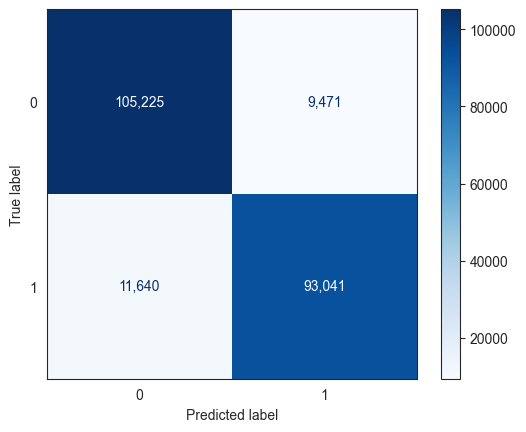

In [84]:
# Creating the confusion matrix & converting it to a dataframe
confusion_matrix_rfc = confusion_matrix(y_true = y_test, y_pred = y_predict_rfc)
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rfc).plot(cmap = "Blues", values_format = ",.0f")

Now, we create re ROC curve and the area under the curve.

Text(0, 0.5, 'True Positive Rate')

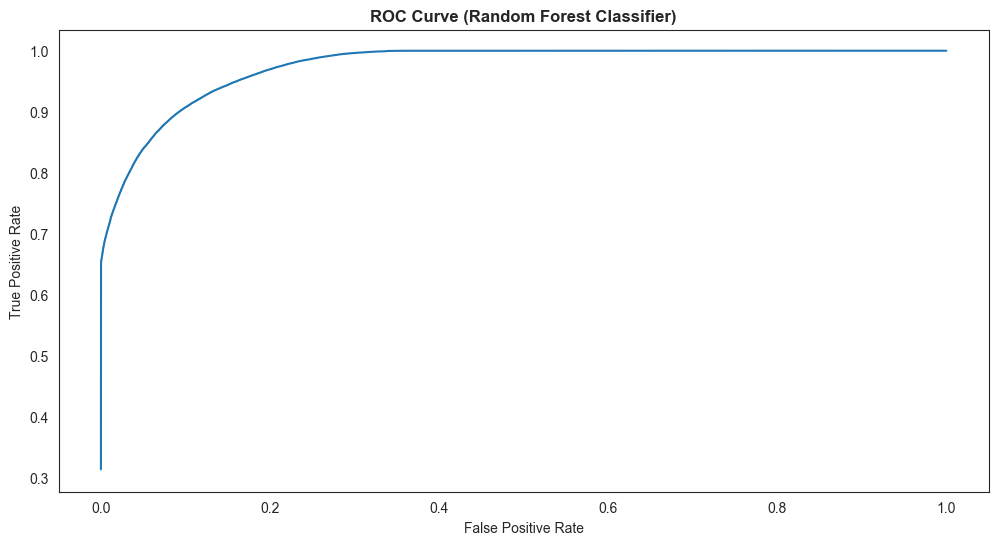

In [85]:
# First convert the values into probability scores
y_prob_rfc = rfc_model.predict_proba(X = X_test)
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(
    y_true = y_test,
    y_score = y_prob_rfc[:, 1]
)

# Plotting the ROC curve
plt.figure(figsize = (12, 6))
sns.lineplot(x = fpr_rfc, y = tpr_rfc)

# Customizing the plot
plt.title("ROC Curve (Random Forest Classifier)", fontweight = "bold")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [86]:
# Getting the ROC score
roc_score_rfc = round(roc_auc_score(
    y_true = y_test,
    y_score = y_prob_rfc[:, 1]
    ), ndigits = 4
)
print(f"The area under the curve is {roc_score_rfc * 100}%. This score implies that my model has strong discriminative power and is an excellent model.")

The area under the curve is 97.49%. This score implies that my model has strong discriminative power and is an excellent model.


### Remarks

In [87]:
# Summary information in a report format
print(classification_report(y_test, y_predict_rfc))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91    114696
           1       0.91      0.89      0.90    104681

    accuracy                           0.90    219377
   macro avg       0.90      0.90      0.90    219377
weighted avg       0.90      0.90      0.90    219377



The Random Forest model (maximum depth = 25, 500 trees) demonstrates strong performance in classifying crimes. For class 0 (less violent crimes), it achieved a **precision of 0.90** and **recall of 0.92**, indicating that most predicted class 0 cases were correct and that the model successfully identified the majority of actual class 0 instances. For class 1 (violent crimes), the model attained a **precision of 0.91** and **recall of 0.89**, showing high correctness of predicted class 1 cases while capturing a substantial portion of actual class 1 instances. Lastly, the model achieved an **F1-score of 0.91** for class 0 and **0.90** for class 1, demonstrating excellent overall classification performance across both crime classes. 

Overall, the decision tree model achieved an **accuracy of 90.41%**, correctly classifying nearly 9 out of 10 cases. Its **ROC AUC of 97.49%** indicates excellent ability to discriminate between the two crime classes (violent and less violent), further supporting its reliability of distinguishing between violent and less violent crimes.

## **Extreme Gradient Boosting (XGBoost) Classifier**

### Running the Model

In [88]:
# Importing the necessary module
from xgboost import XGBClassifier

# Fitting the model
xgb_model = XGBClassifier(
    n_estimators = 1000,
    learning_rate = 0.1,
    max_depth = 50,
    random_state = 49,
    use_label_encoder = False,
    eval_metric = "logloss"
)
xgb_model.fit(X = X_train, y = y_train)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [01:17:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=50, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, ...)

In [89]:
# Predicting the target
y_predict_xgb = xgb_model.predict(X = X_test)

### Performance

First, we measure the accuracy score of the model.

In [90]:
# Calculating the accuracy
accuracy_xgb = round(
    accuracy_score(y_true = y_test, y_pred = y_predict_xgb), ndigits = 3
)
print(f"The accuracy of the model is {accuracy_xgb * 100}%. This means that about 9 out of 10 predictions are correct, which means it is a very good model.")

The accuracy of the model is 89.1%. This means that about 9 out of 10 predictions are correct, which means it is a very good model.


Then we generate the confusion matrix.

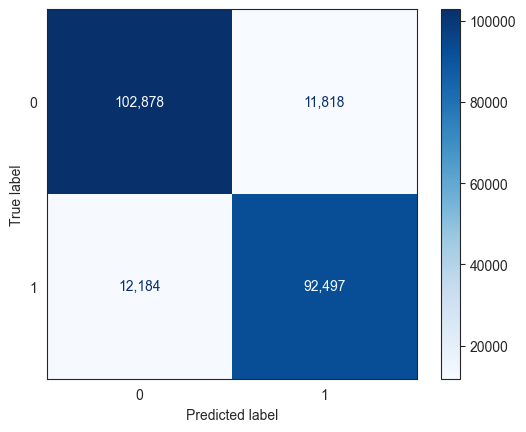

In [91]:
# Creating the confusion matrix & converting it to a dataframe
confusion_matrix_xgb = confusion_matrix(y_true = y_test, y_pred = y_predict_xgb)
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_xgb).plot(cmap = "Blues", values_format = ",.0f")

Now, we create re ROC curve and the area under the curve.

Text(0, 0.5, 'True Positive Rate')

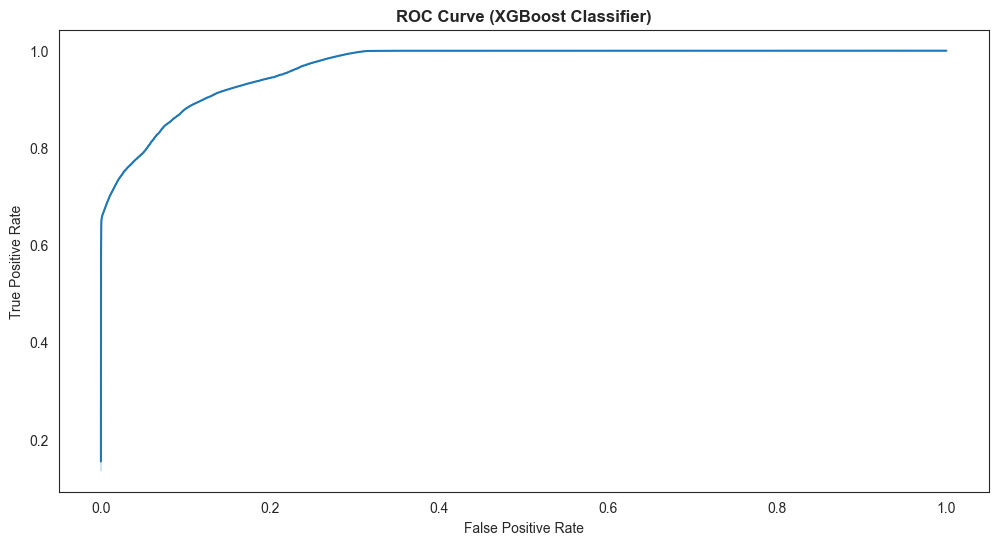

In [92]:
# First convert the values into probability scores
y_prob_xgb = xgb_model.predict_proba(X = X_test)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(
    y_true = y_test,
    y_score = y_prob_xgb[:, 1]
)

# Plotting the ROC curve
plt.figure(figsize = (12, 6))
sns.lineplot(x = fpr_xgb, y = tpr_xgb)

# Customizing the plot
plt.title("ROC Curve (XGBoost Classifier)", fontweight = "bold")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [93]:
# Getting the ROC score
roc_score_xgb = round(roc_auc_score(
    y_true = y_test,
    y_score = y_prob_xgb[:, 1]
), ndigits = 4)
print(f"The area under the curve is {roc_score_xgb * 100}%. This score implies that my model has strong discriminative power and is an excellent model.")

The area under the curve is 96.78%. This score implies that my model has strong discriminative power and is an excellent model.


### Remarks

In [94]:
# Summary information in a report format
print(classification_report(y_test, y_predict_xgb))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90    114696
           1       0.89      0.88      0.89    104681

    accuracy                           0.89    219377
   macro avg       0.89      0.89      0.89    219377
weighted avg       0.89      0.89      0.89    219377



The XGBoost model (maximum depth = 50, 1000 estimators) demonstrates strong performance in classifying crimes. For class 0 (less violent crimes), it achieved a **precision of 0.89** and **recall of 0.90**, indicating that most predicted class 0 cases were correct and that the model successfully identified the majority of actual class 0 instances. For class 1 (violent crimes), the model attained a **precision of 0.89** and **recall of 0.88**, showing high correctness of predicted class 1 cases while capturing a substantial portion of actual class 1 instances. Lastly, the model achieved an **F1-score of 0.90** for class 0 and **0.89** for class 1, demonstrating excellent overall classification performance across both crime classes.

Overall, the XGBoost model achieved an accuracy of **89.1%**, correctly classifying nearly 9 out of 10 cases. Its **ROC AUC 96.78%** would indicate strong ability to discriminate between the two crime classes (violent and less violent), supporting its reliability in distinguishing between violent and less violent crimes.

## **KNN Classifier**

### Running the Model

In [95]:
# Importing the necessary library for conducting K-Nearest Neighbours Classification
from sklearn.neighbors import KNeighborsClassifier

# Fitting the model for logistic regression
knn_model = KNeighborsClassifier()
knn_model.fit(X = X_train, y = y_train)

KNeighborsClassifier()

In [96]:
# Predicting the target
y_predict_knn = knn_model.predict(X = X_test)

### Performance & Evaluation

In [97]:
# Calculating the accuracy
accuracy_knn = round(
    accuracy_score(y_true = y_test, y_pred = y_predict_knn), ndigits = 4
)
print(f"The accuracy of the model is {accuracy_knn * 100}%. This means that about 9 out of 10 predictions are correct, which means it is a very good model.")

The accuracy of the model is 88.83%. This means that about 9 out of 10 predictions are correct, which means it is a very good model.


Now let us create the confusion matrix.

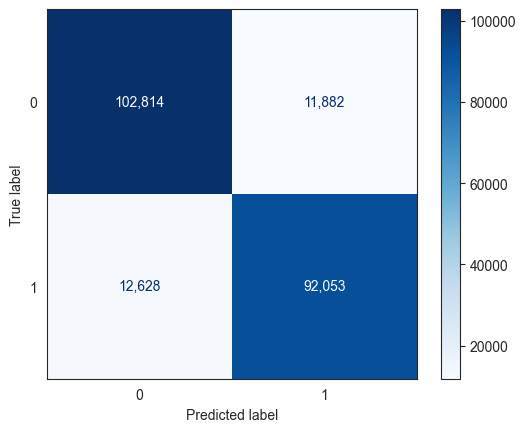

In [98]:
# Creating the confusion matrix & converting it to a dataframe
confusion_matrix_knn = confusion_matrix(y_true = y_test, y_pred = y_predict_knn)
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_knn).plot(cmap = "Blues", values_format = ",.0f")

Now, time for the Receiver Operating Characteristic (**ROC**) Curve and the ROC AUC score.

Text(0, 0.5, 'True Positive Rate')

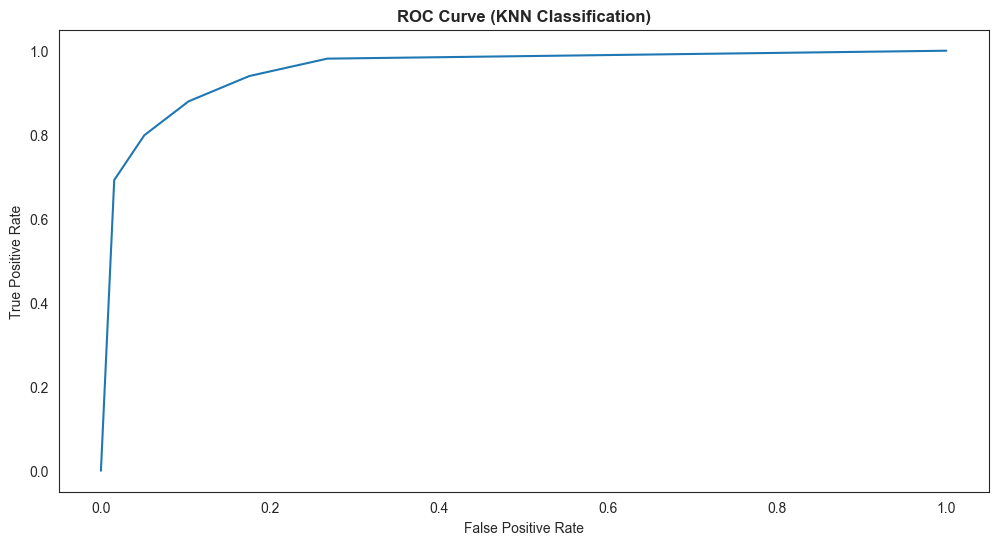

In [99]:
# First convert the values into probability scores
y_prob_knn = knn_model.predict_proba(X = X_test)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(
    y_true = y_test,
    y_score = y_prob_knn[:, 1]
)

# Plotting the ROC curve
plt.figure(figsize = (12, 6))
sns.lineplot(x = fpr_knn, y = tpr_knn,)

# Customizing the plot
plt.title("ROC Curve (KNN Classification)", fontweight = "bold")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [100]:
# Getting the ROC score
roc_score_knn = round(roc_auc_score(
    y_true = y_test,
    y_score = y_prob_knn[:, 1]
    ), ndigits = 3
)
print(f"The area under the curve is {roc_score_knn * 100}%. This score implies that my model has strong discriminative power and is an excellent model.")

The area under the curve is 95.5%. This score implies that my model has strong discriminative power and is an excellent model.


### Remarks

In [101]:
# Summary information in a mini report format
print(classification_report(y_test, y_predict_knn))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89    114696
           1       0.89      0.88      0.88    104681

    accuracy                           0.89    219377
   macro avg       0.89      0.89      0.89    219377
weighted avg       0.89      0.89      0.89    219377



The K-Nearest Neighbour Classifier model demonstrates strong performance in classifying crimes. For class 0 (less violent crimes), it achieved a **precision of 0.89** and **recall of 0.90**, indicating that most predicted class 0 cases were correct and that the model successfully identified the majority of actual class 0 instances. For class 1 (violent crimes), the model attained a **precision of 0.89** and **recall of 0.88**, showing high correctness of predicted class 1 cases while capturing a substantial portion of actual class 1 instances. Lastly, the model achieved an **F1-score of 0.89** for class 0 and **0.88** for class 1, demonstrating excellent overall classification performance across both crime classes.

Overall, the KNN model achieved an accuracy of **88.83%**, correctly classifying nearly 9 out of 10 cases. Its **ROC AUC 95.5%** would indicate strong ability to discriminate between the two crime classes (violent and less violent), supporting its reliability in distinguishing between violent and less violent crimes.

## **Gaussian Naive Bayes**

### Running the Model

In [102]:
# Importing the necessary library for conducting Gaussian Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB

# Fitting the model for logistic regression
gnb_model = GaussianNB()
gnb_model.fit(X = X_train, y = y_train)

GaussianNB()

In [103]:
# Predicting the target
y_predict_gnb = gnb_model.predict(X = X_test)

### Performance & Evaluation

In [104]:
# Calculating the accuracy
accuracy_gnb = round(
    accuracy_score(y_true = y_test, y_pred = y_predict_gnb), ndigits = 4
)
print(f"The accuracy of the model is {accuracy_gnb * 100}%. This means that about 7 out of 10 predictions are correct, which means it is a good model.")

The accuracy of the model is 77.39%. This means that about 7 out of 10 predictions are correct, which means it is a good model.


Now let us create the confusion matrix.

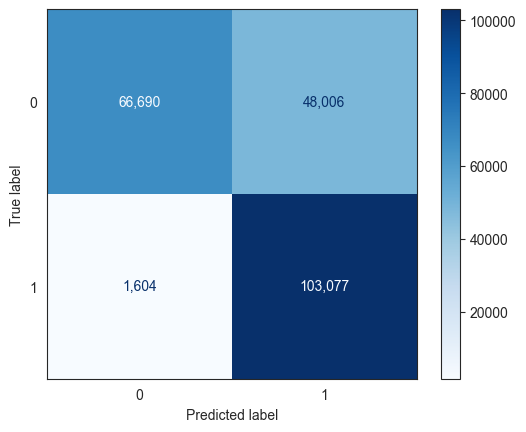

In [105]:
# Creating the confusion matrix & converting it to a dataframe
confusion_matrix_gnb = confusion_matrix(y_true = y_test, y_pred = y_predict_gnb)
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_gnb).plot(cmap = "Blues", values_format = ",.0f")

Now, time for the Receiver Operating Characteristic (**ROC**) Curve and the ROC AUC score.

Text(0, 0.5, 'True Positive Rate')

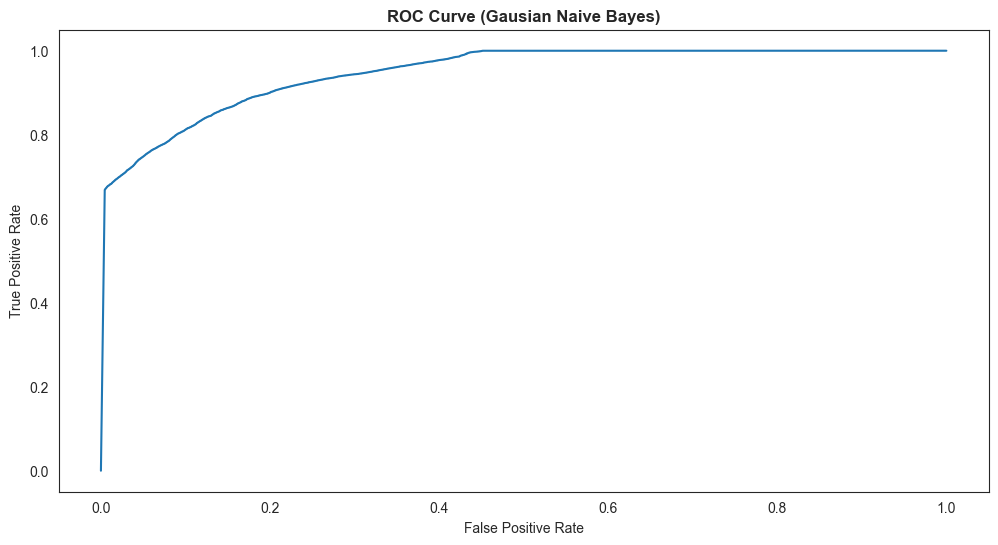

In [106]:
# First convert the values into probability scores
y_prob_gnb = gnb_model.predict_proba(X = X_test)
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(
    y_true = y_test,
    y_score = y_prob_gnb[:, 1]
)

# Plotting the ROC curve
plt.figure(figsize = (12, 6))
sns.lineplot(x = fpr_gnb, y = tpr_gnb,)

# Customizing the plot
plt.title("ROC Curve (Gausian Naive Bayes)", fontweight = "bold")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [107]:
# Getting the ROC score
roc_score_gnb = round(roc_auc_score(
    y_true = y_test,
    y_score = y_prob_gnb[:, 1]
    ), ndigits = 5
)
print(f"The area under the curve is {roc_score_gnb * 100}%. This score implies that my model has strong discriminative power and is an excellent model.")

The area under the curve is 94.702%. This score implies that my model has strong discriminative power and is an excellent model.


### Remarks

In [108]:
# Summary information in a mini report format
print(classification_report(y_test, y_predict_gnb))

              precision    recall  f1-score   support

           0       0.98      0.58      0.73    114696
           1       0.68      0.98      0.81    104681

    accuracy                           0.77    219377
   macro avg       0.83      0.78      0.77    219377
weighted avg       0.84      0.77      0.77    219377



The Gaussian Naive Bayes model demonstrates strong performance in classifying crimes. For class 0 (less violent crimes), it achieved a **precision of 0.98** and **recall of 0.58**, indicating that most predicted class 0 cases were correct but the model missed a considerable portion of actual class 0 instances. For class 1 (violent crimes), the model attained a **precision of 0.68** and **recall of 0.98**, showing that while predicted class 1 cases were moderately correct, the model successfully identified nearly all actual class 1 instances. Lastly, the model achieved an **F1-score of 0.73** for class 0 and **0.81** for class 1, reflecting a stronger balance between precision and recall for violent crimes than for less violent ones.

Overall, the KNN model achieved an accuracy of **77.39%**, correctly classifying nearly 8 out of 10 cases. Its **ROC AUC 94.702%** would indicate strong ability to discriminate between the two crime classes (violent and less violent), supporting its reliability in distinguishing between violent and less violent crimes.

# **<u>Conclusion<u>**

## **Best Model Selection**

After running a total of **four** models, here are the summary of the performance of the models.

In [109]:
# Creating a summary table of all the performance metrics of the models
summary_table = pd.DataFrame(
    {
        "Model Name": ["Accuracy", "Area Under the ROC Curve", "Precision (Less Violent)", "Precision (Violent)", "Recall (Less Violent)", "Recall (Violent)", "F1 Score (Less Violent)", "F1 Score (Violent)"],
        "Logistic Regression": [accuracy_log, roc_score_log, 0.89, 0.90, 0.91, 0.88, 0.90, 0.89],
        "Support Vector Machine (SVM)": [accuracy_svm, "-", 0.68, 0.63, 0.63, 0.67, 0.66, 0.65],
        "Decision Tree Classifier": [accuracy_clf, roc_score_clf, 0.88, 0.91, 0.92, 0.86, 0.90, 0.88],
        "Random Forest Classifier": [accuracy_rfc, roc_score_rfc, 0.90, 0.91, 0.92, 0.89, 0.91, 0.90],
        "Extreme Gradient Boosting (XGBoost) Classifier": [accuracy_xgb, roc_score_xgb, 0.89, 0.89, 0.90, 0.88, 0.90, 0.89],
        "K-Nearest Neighbour Classifier": [accuracy_knn, roc_score_knn, 0.89, 0.89, 0.90, 0.88, 0.89, 0.88],
        "Gaussian Naive Bayes": [accuracy_gnb, roc_score_gnb, 0.98, 0.68, 0.58, 0.98, 0.73, 0.81]
    }
)
summary_table

Model Name  Logistic Regression Support Vector Machine (SVM)  \
0                  Accuracy               0.8963                        0.652   
1  Area Under the ROC Curve               0.9711                            -   
2  Precision (Less Violent)               0.8900                         0.68   
3       Precision (Violent)               0.9000                         0.63   
4     Recall (Less Violent)               0.9100                         0.63   
5          Recall (Violent)               0.8800                         0.67   
6   F1 Score (Less Violent)               0.9000                         0.66   
7        F1 Score (Violent)               0.8900                         0.65   

   Decision Tree Classifier  Random Forest Classifier  \
0                    0.8925                    0.9040   
1                    0.9659                    0.9749   
2                    0.8800                    0.9000   
3                    0.9100                    0.9100   
4                    0.9200                    0.9200   
5                    0.8600                    0.8900   
6                    0.9000                    0.9100   
7                    0.8800                    0.9000   

   Extreme Gradient Boosting (XGBoost) Classifier  \
0                                          0.8910   
1                                          0.9678   
2                                          0.8900   
3                                          0.8900   
4                                          0.9000   
5                                          0.8800   
6                                          0.9000   
7                                          0.8900   

   K-Nearest Neighbour Classifier  Gaussian Naive Bayes  
0                          0.8883               0.77390  
1                          0.9550               0.94702  
2                          0.8900               0.98000  
3                          0.8900               0.68000  
4                          0.9000               0.58000  
5                          0.8800               0.98000  
6                          0.8900               0.73000  
7                          0.8800               0.81000

Some visualizations help see the patterns across the models very clearly

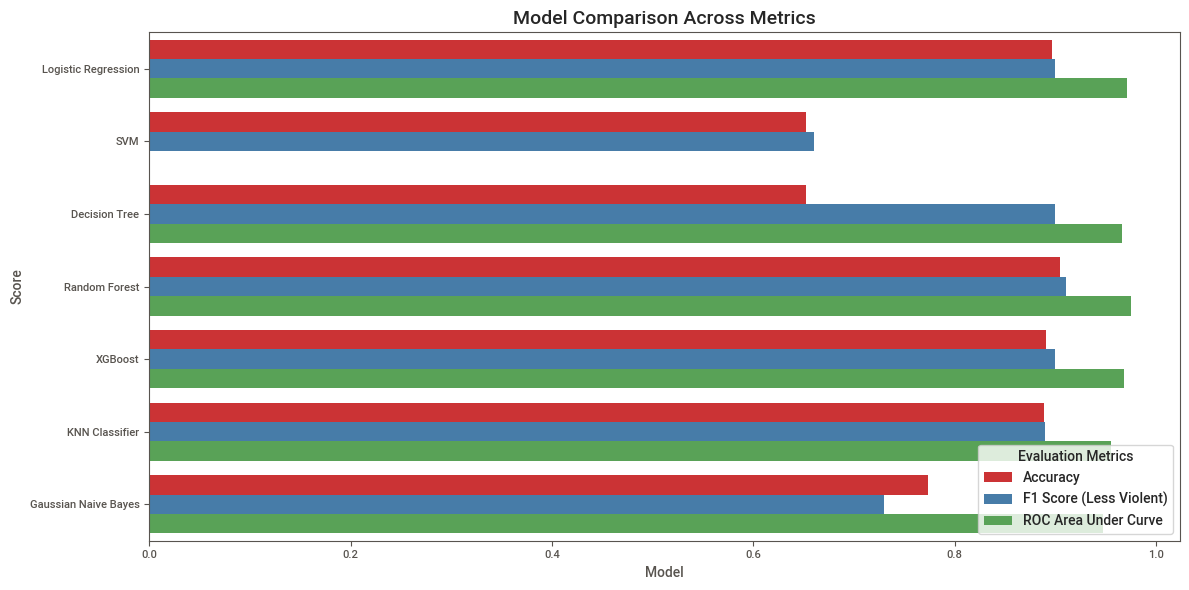

In [117]:
# Create e short dataset for the visualization
barchart_data = pd.DataFrame(
    {
        "Model": ["Logistic Regression", "SVM", "Decision Tree", "Random Forest", "XGBoost", "KNN Classifier", "Gaussian Naive Bayes"],
        "Accuracy": [accuracy_log, accuracy_svm, accuracy_svm, accuracy_rfc, accuracy_xgb, accuracy_knn, accuracy_gnb],
        "F1 Score (Less Violent)": [0.9, 0.66, 0.9, 0.91, 0.90, 0.89, 0.73],
        "ROC Area Under Curve": [roc_score_log, 0, roc_score_clf, roc_score_rfc, roc_score_xgb, roc_score_knn, roc_score_gnb]
    }
)

# Melt the dataset to long format for seaborn
data_melted = barchart_data.melt(
    id_vars = "Model",
    value_vars = ["Accuracy", "F1 Score (Less Violent)", "ROC Area Under Curve"],
    var_name = "Metric",
    value_name = "Score"
)

# Plot side-by-side bar chart
plt.figure(figsize = (12, 6))
sns.barplot(
    data = data_melted,
    y = "Model",
    x = "Score",
    hue = "Metric",
    palette = "Set1"
)

plt.title("Model Comparison Across Metrics", fontsize = 14, fontweight = "bold")
plt.xlabel("Model", fontweight = "bold")
plt.ylabel("Score", fontweight = "bold")
plt.legend(title = "Evaluation Metrics")
plt.tight_layout()

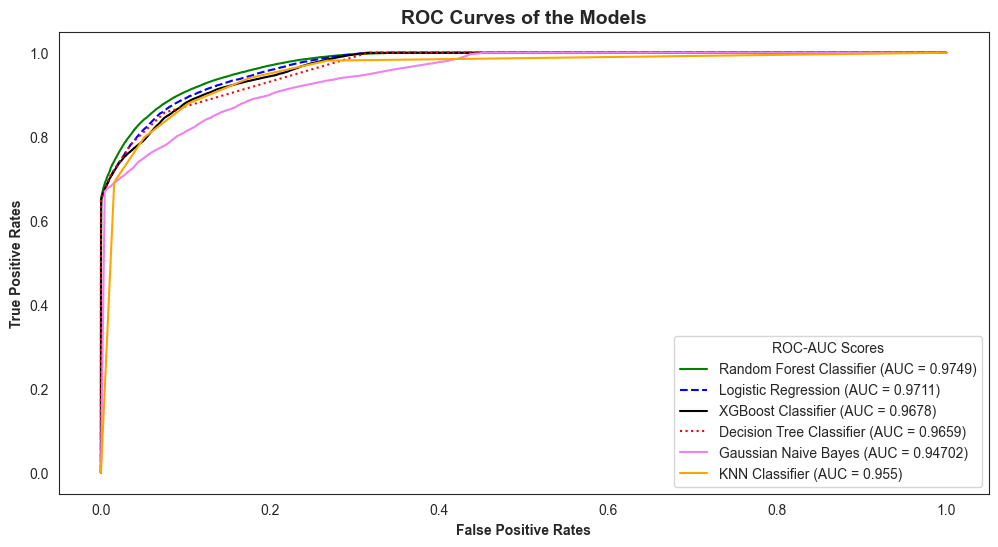

In [111]:
# A plot displaying all the ROC curves of the models
plt.figure(figsize=(12,6))
plt.plot(fpr_rfc, tpr_rfc, label = f"Random Forest Classifier (AUC = {roc_score_rfc})", color = "green")
plt.plot(fpr_log, tpr_log, label = f"Logistic Regression (AUC = {roc_score_log})", color = "blue", linestyle = "--")
plt.plot(fpr_xgb, tpr_xgb, label = f"XGBoost Classifier (AUC = {roc_score_xgb})", color = "black")
plt.plot(fpr_clf, tpr_clf, label = f"Decision Tree Classifier (AUC = {roc_score_clf})", color = "red", linestyle = ":")
plt.plot(fpr_gnb, tpr_gnb, label = f"Gaussian Naive Bayes (AUC = {roc_score_gnb})", color = "violet")
plt.plot(fpr_knn, tpr_knn, label = f"KNN Classifier (AUC = {roc_score_knn})", color = "orange")
plt.title("ROC Curves of the Models", fontsize = 14, fontweight = "bold")
plt.xlabel("False Positive Rates", fontweight = "bold")
plt.ylabel("True Positive Rates", fontweight = "bold")
plt.legend(title = "ROC-AUC Scores", loc = 4)

As can be shown from the graphs and the table above, the accuracy of **Random Forest Classifier** is the highest and the lowest accuracy is for the **Support Vector Machine (SVM)** model. Similarly, the random forest also scores highest in Precision (class 0), Recall (class 0), and has the highest area under curve (ROC AUC) as well. Random forest scored the lowest in room mean-squared error where the lower the score is, the better the model.

So judging from the performance of the four models, we can say that **Random Forest Classifier** is the best performing model among the four for this dataset. The next best model is **Logistic Regression**. On 3rd position we have **Extreme Gradient Boosting (XGBoost) Classifier** and in 4th position it is **Decision Tree Classifier** and the worst performing model for this dataset is **Support Vector Machine (SVM)**.

**To rank the performance of the models**:
1. Random Forest Classifier
2. Logistic Regression
3. Extreme Gradient Boosting (XGBoost) Classifier
4. Decision Tree Classifier
5. Gaussian Naive Bayes
6. K-Nearest Neighbors (KNN)
7. Support Vector Machine (SVM)

## **Final Reporting**

There are two libraries that create automatic hands-on reports that are very detailed and comprehensive. Such reports are generated below for a quick look.

In [112]:
# Generating report with ydata_profiling
import ydata_profiling
ydata_profiling.ProfileReport(df = crime)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

                                             |          | [  0%]   00:00 -> (? left)


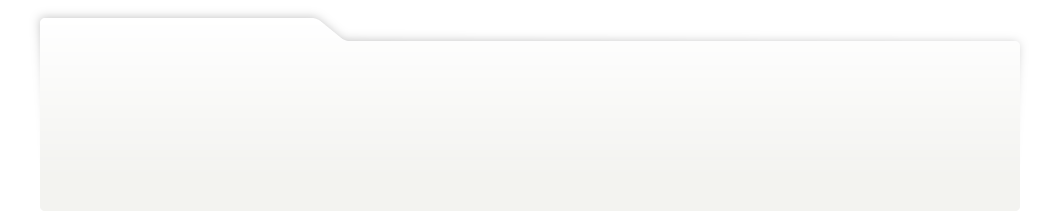
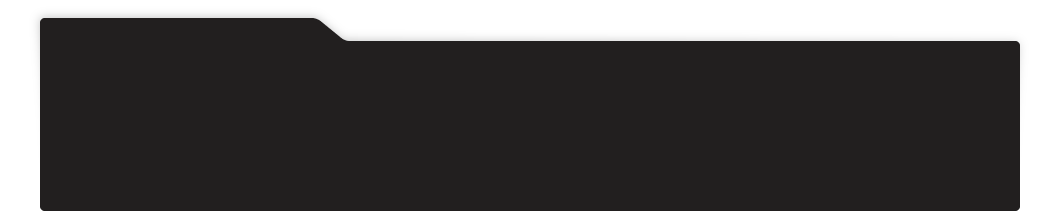
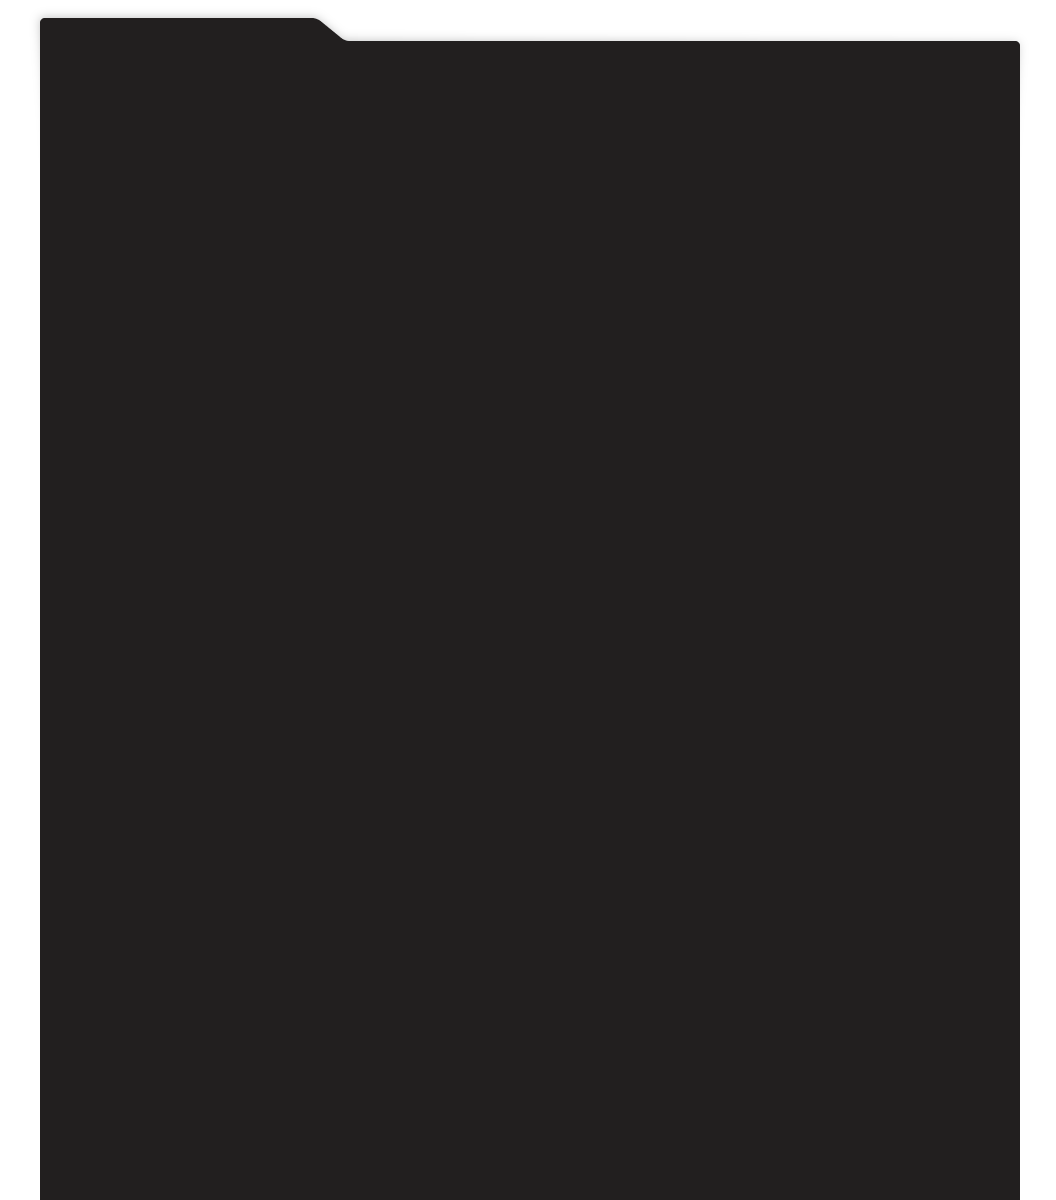
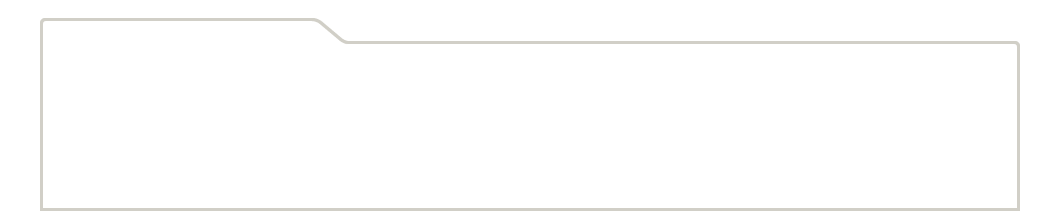
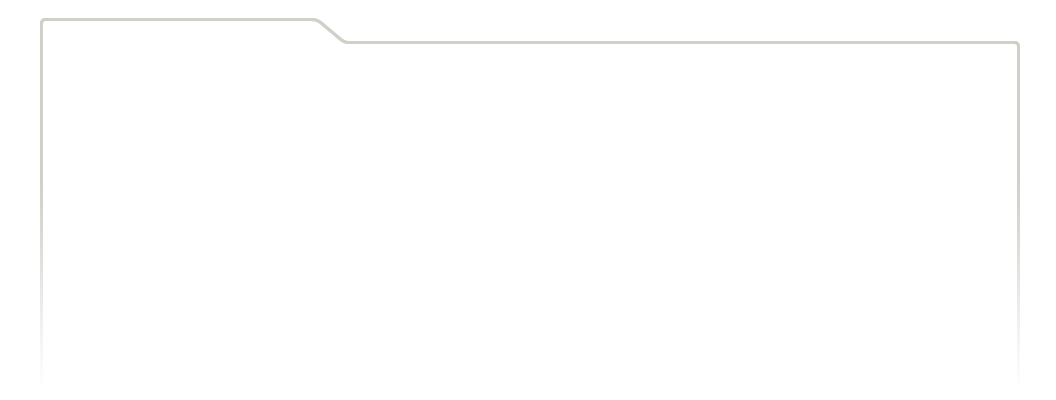
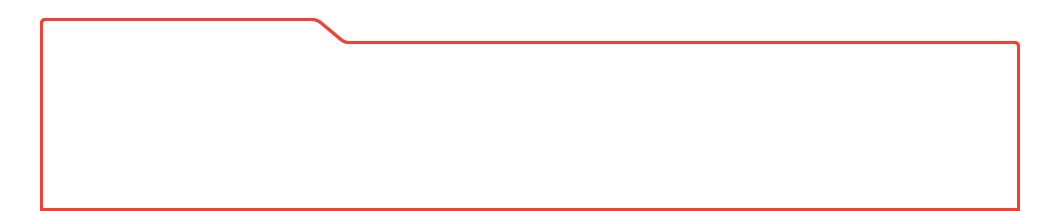
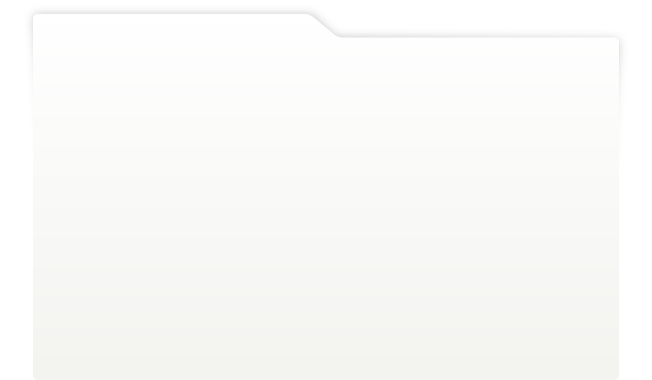
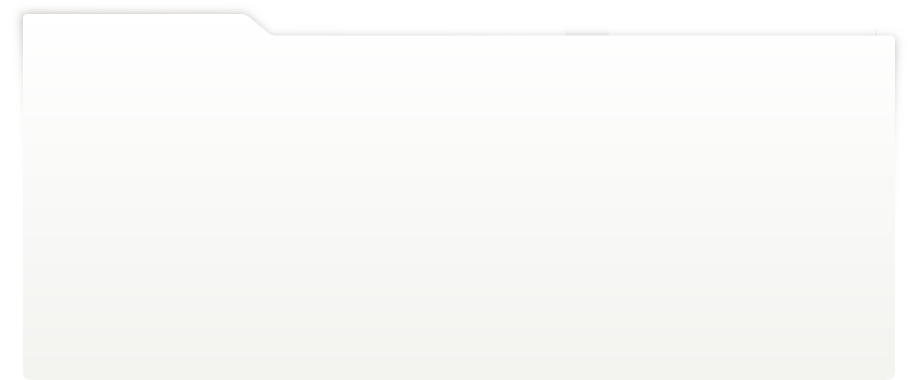
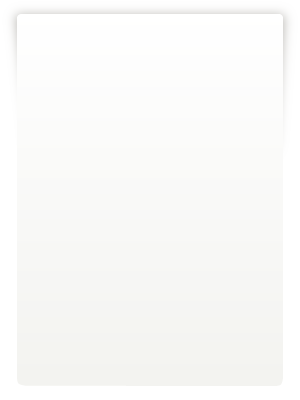
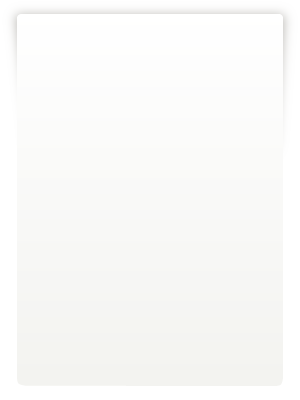
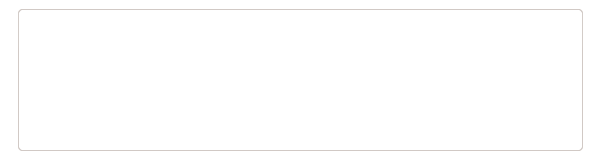
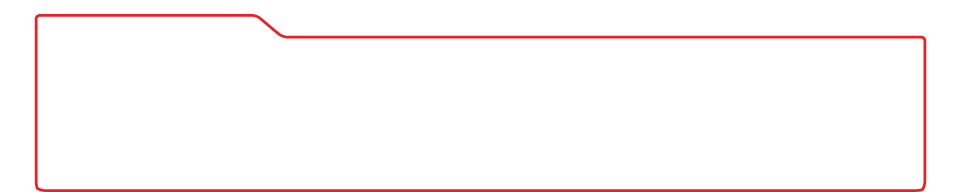
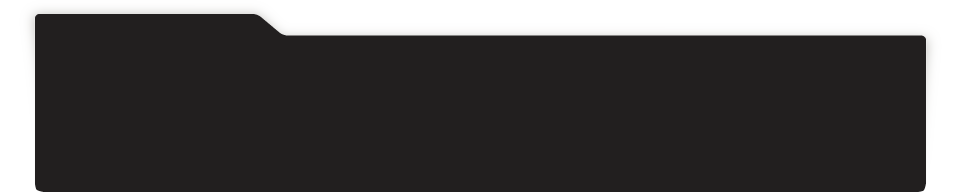
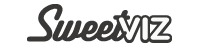
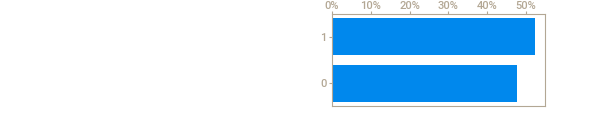
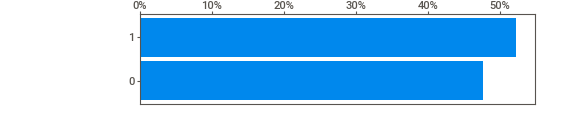
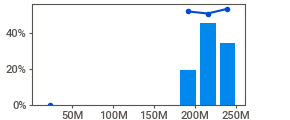
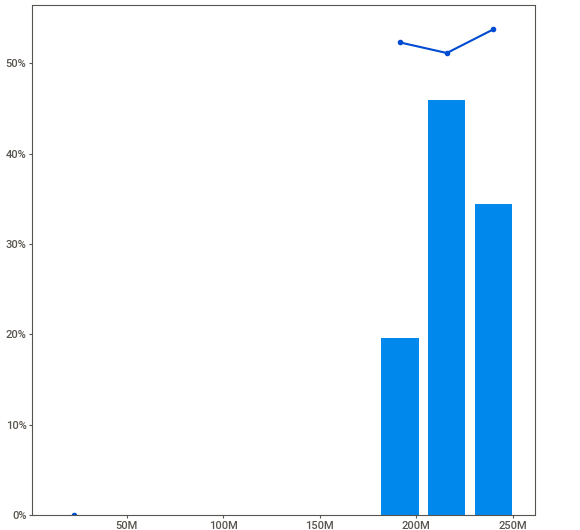
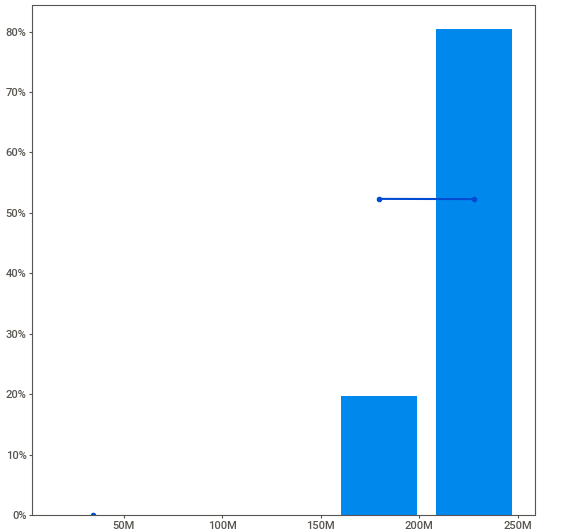
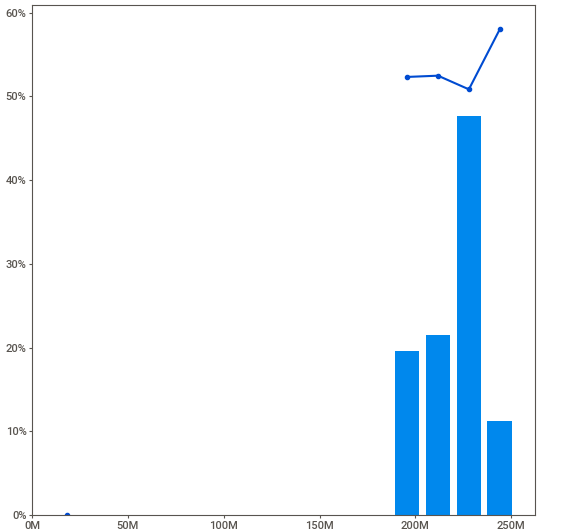
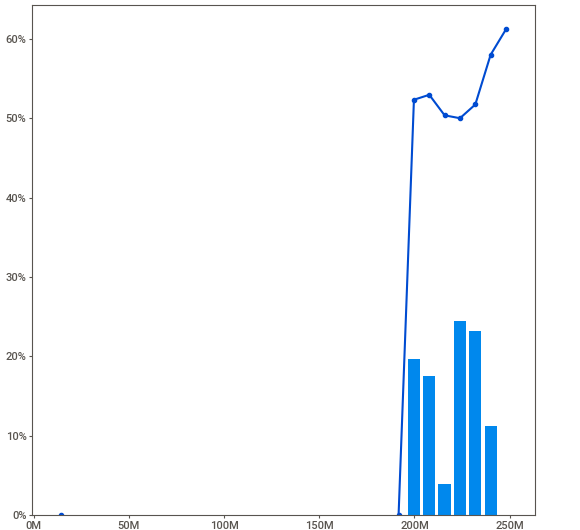
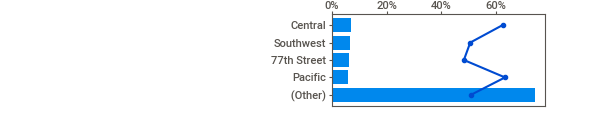
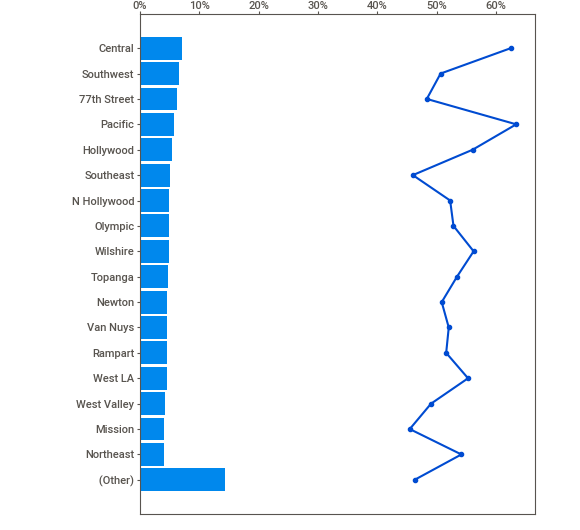
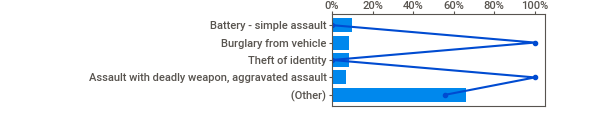
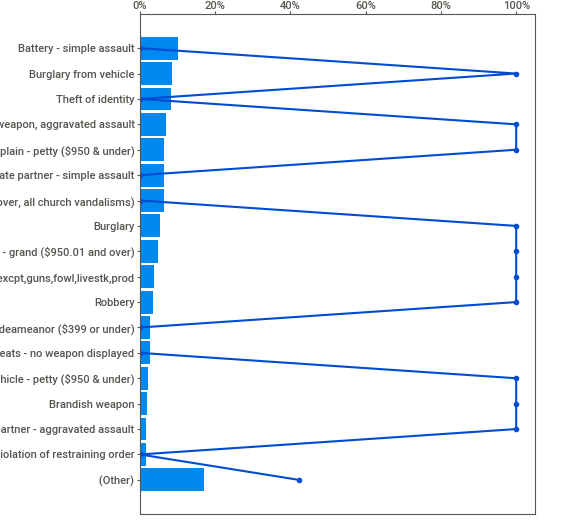
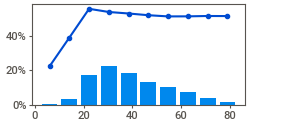
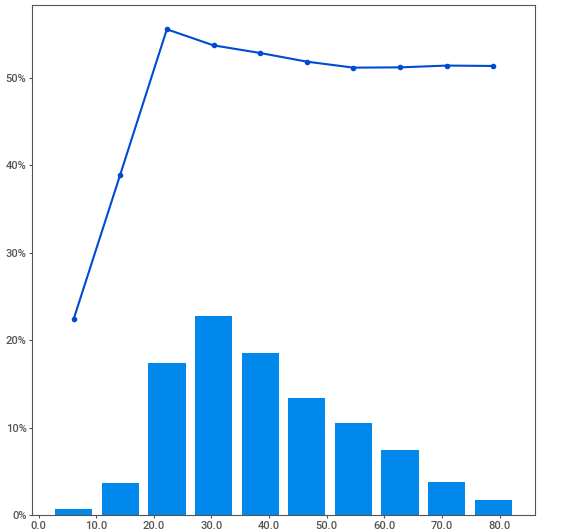
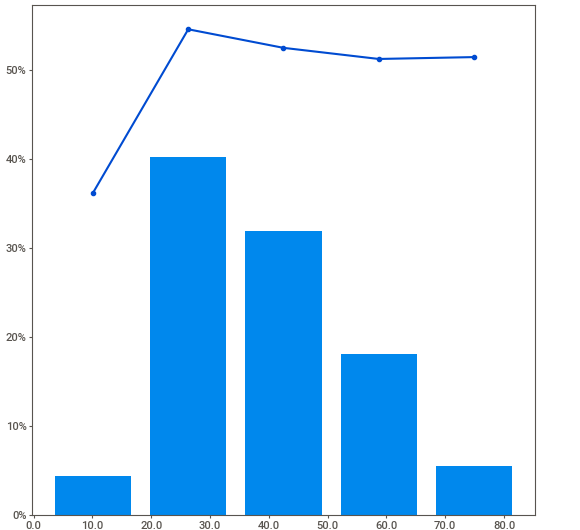
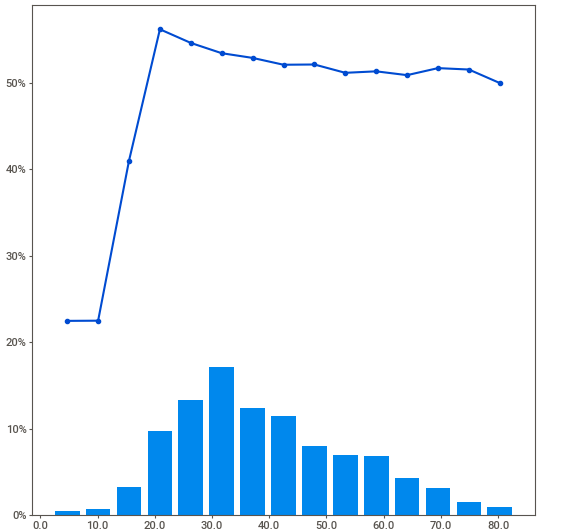
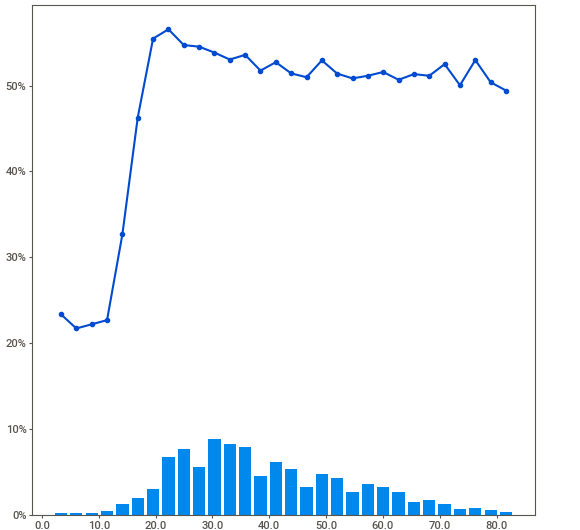
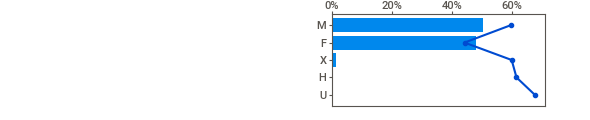
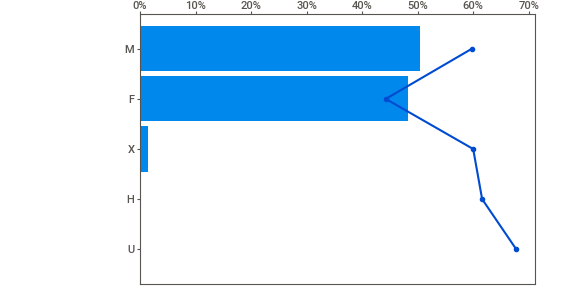
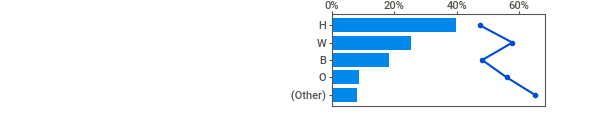
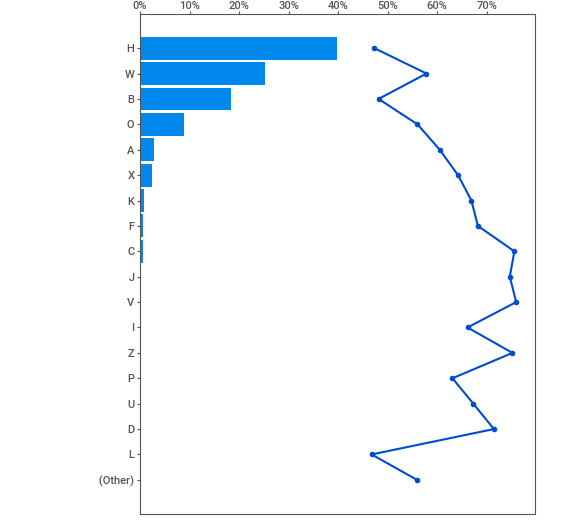
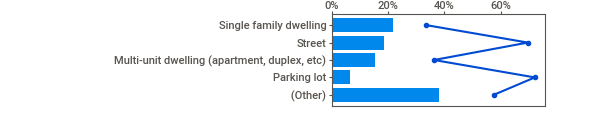
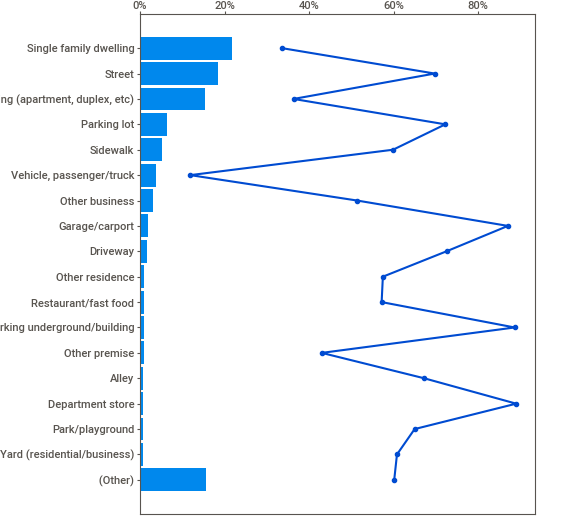
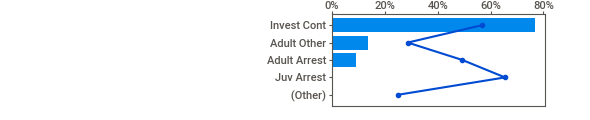
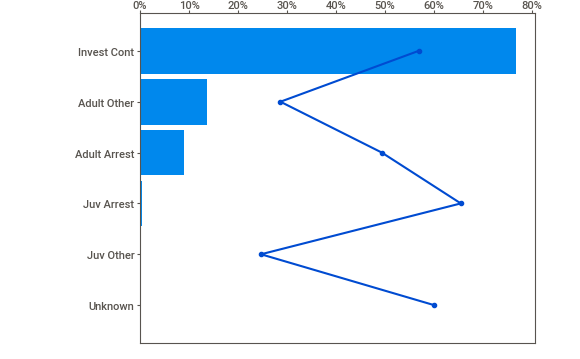
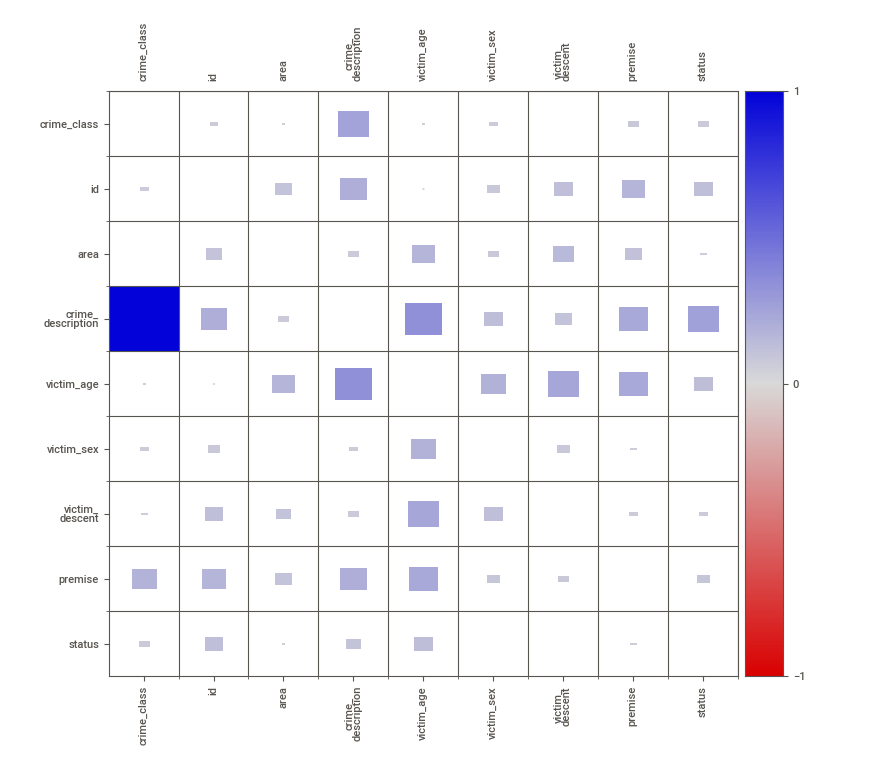
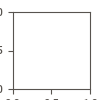

In [113]:
# Converting the target column to numeric
crime_report = crime.copy()
crime_report["crime_class"] = crime["crime_class"].map(
    {
        "Less Violent Crimes" : 0,
        "Violent Crimes" : 1
    }
).astype("int64")

# Generating report with sweetviz
import sweetviz
summary_report = sweetviz.analyze(
    source = [crime_report, "Crime Dataset"],
    target_feat = "crime_class"
)
summary_report.show_notebook()